# INTEGRANTES


* Casanova, Beverly

* Nuñez, Lourdes

* Perez, Micaela

* Cardozo, Pamela

## Objetivos del proyecto
* Detectar patrones en fraudes considerenado hora del dia, categoria y lugar.
* Entender cómo y por qué ocurren los fraudes con tarjetas de crédito
* Identificar variables relevantes para la detección de fraude


## Origen del Dataset
Debido a que la mayoría de los Dataset de Argentina son incompletos,con pocos datos y en su mayoría privados, elegimos un Dataset Internacional, y simularemos que es un banco de Argentina. Proporcionamos el link de nuestro Dataset: https://www.kaggle.com/datasets/kelvinkelue/credit-card-fraud-prediction

In [ ]:
#Importar Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, homogeneity_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.svm import OneClassSVM
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, homogeneity_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fraude = pd.read_csv('/content/drive/MyDrive/Curso Ingenias/fraud_test.csv', sep="," , index_col=0)
df_fraude.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
#Separar la fecha y la hora en columnas distintas

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])

# Crear nuevas columnas para la fecha y la hora
df_fraude['fecha'] = df_fraude['trans_date_trans_time'].dt.date
df_fraude['hora'] = df_fraude['trans_date_trans_time'].dt.time

# Mostrar las primeras filas para verificar
print(df_fraude[['trans_date_trans_time', 'fecha', 'hora']].head())

<ipython-input-6-98a607ebf167>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])


  trans_date_trans_time       fecha      hora
0   2020-06-21 12:14:00  2020-06-21  12:14:00
1   2020-06-21 12:14:00  2020-06-21  12:14:00
2   2020-06-21 12:14:00  2020-06-21  12:14:00
3   2020-06-21 12:15:00  2020-06-21  12:15:00
4   2020-06-21 12:15:00  2020-06-21  12:15:00


In [ ]:
#Separar la fecha de nacimiento en nuevas columnas

# Asegúrate de que 'dob' esté en formato datetime
df_fraude['dob'] = pd.to_datetime(df_fraude['dob'], dayfirst=True)

# Crear nuevas columnas para el año, mes y día de nacimiento
df_fraude['anio_nacimiento'] = df_fraude['dob'].dt.year
df_fraude['mes_nacimiento'] = df_fraude['dob'].dt.month
df_fraude['dia_nacimiento'] = df_fraude['dob'].dt.day

# Mostrar las primeras filas para verificar
print(df_fraude[['dob', 'anio_nacimiento', 'mes_nacimiento', 'dia_nacimiento']].head())

         dob  anio_nacimiento  mes_nacimiento  dia_nacimiento
0 1968-03-19             1968               3              19
1 1990-01-17             1990               1              17
2 1970-10-21             1970              10              21
3 1987-07-25             1987               7              25
4 1955-07-06             1955               7               6


In [ ]:
#Calcular la Edad:

# Definir la función calcular_edad
def calcular_edad(fecha_nacimiento, fecha_actual):
    edad = fecha_actual.year - fecha_nacimiento.year
    if fecha_actual.month < fecha_nacimiento.month or (fecha_actual.month == fecha_nacimiento.month and fecha_actual.day < fecha_nacimiento.day):
        edad -= 1
    return edad

# Convertir la columna 'trans_date_trans_time' a tipo datetime
df_fraude['trans_date_trans_time'] = pd.to_datetime(df_fraude['trans_date_trans_time'])

# Crear nuevas columnas para la fecha y la hora
df_fraude['fecha'] = df_fraude['trans_date_trans_time'].dt.date
df_fraude['hora'] = df_fraude['trans_date_trans_time'].dt.time

# Convertir la columna 'dob' a tipo datetime, especificando el formato
df_fraude['dob'] = pd.to_datetime(df_fraude['dob'], dayfirst=True)

# Obtener la fecha actual o usar una columna específica
fecha_actual = pd.to_datetime('today').date()

# Calcular la edad basado en la fecha de la transacción o fecha actual
df_fraude['edad'] = df_fraude['dob'].apply(lambda dob: calcular_edad(pd.to_datetime(dob).date(), fecha_actual))

# Mostrar las primeras filas para verificar
print(df_fraude[['dob', 'edad', 'fecha', 'hora']].head())

         dob  edad       fecha      hora
0 1968-03-19    56  2020-06-21  12:14:00
1 1990-01-17    34  2020-06-21  12:14:00
2 1970-10-21    53  2020-06-21  12:14:00
3 1987-07-25    37  2020-06-21  12:15:00
4 1955-07-06    69  2020-06-21  12:15:00


In [ ]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  float64       
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

## MÉTODO K - MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


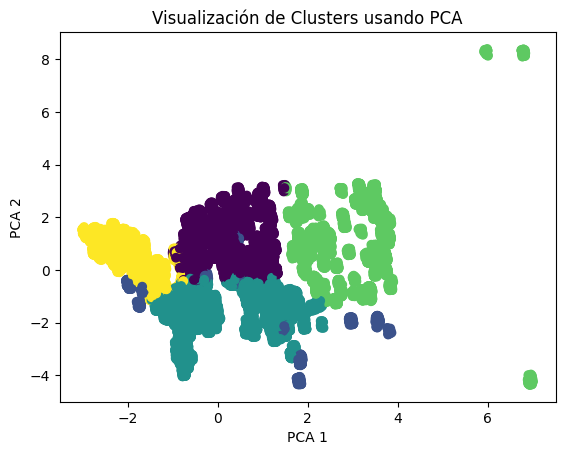

Cluster Analysis:
           amt    lat   long  city_pop  merch_lat  merch_long   edad       zip
cluster                                                                       
0        68.03  38.57 -90.29  87178.05      38.57      -90.29  50.40  48976.72
1        67.45  38.61 -89.71  72778.82      38.61      -89.70  51.14  47554.96
2        70.81  38.51 -90.17  87945.63      38.51      -90.17  50.54  48880.57
3        69.45  38.53 -90.13  81961.31      38.54      -90.12  50.61  48655.79
4        70.36  38.60 -90.32  85804.34      38.61      -90.32  50.31  49009.55
Explained Variance Ratio:
PC1: 0.36
PC2: 0.26
Total: 0.62


In [ ]:
# Normalizar/estandarizar datos numéricos
scaler = StandardScaler()
df_fraude_scaled = scaler.fit_transform(df_fraude[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'zip']])

# Convertir el resultado a un DataFrame

# Reducir a 50,000 filas
df_fraude = df_fraude.sample(n=50000, random_state=42)

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajustar el número de clusters según tu caso
df_fraude['cluster'] = kmeans.fit_predict(df_fraude_scaled)

# Opcional: Reducir dimensionalidad para visualización
pca = PCA(n_components=2)
df_fraude['pca1'], df_fraude['pca2'] = pca.fit_transform(df_fraude_scaled).T

# Visualizar los clusters
plt.scatter(df_fraude['pca1'], df_fraude['pca2'], c=df_fraude['cluster'])
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Analizar los clusters
cluster_analysis = df_fraude.groupby('cluster').agg({
    'amt': 'mean',
    'lat': 'mean',
    'long': 'mean',
    'city_pop': 'mean',
    'merch_lat': 'mean',
    'merch_long': 'mean',
    'edad': 'mean',
    'zip': 'mean'
}).round(2)

print("Cluster Analysis:")
print(cluster_analysis)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\
Explained Variance Ratio:")
print(f"PC1: {explained_variance[0]:.2f}")
print(f"PC2: {explained_variance[1]:.2f}")
print(f"Total: {sum(explained_variance):.2f}")

**Descripción General de los Clusters:**




* Cluster 0: Representa áreas con una población moderada (40,090 personas) y una edad promedio de 49.84 años, con poca variabilidad geográfica.

* Cluster 1: Agrupa áreas metropolitanas densas (población promedio de 1,543,473), con una edad promedio más joven (44.24 años).

* Cluster 2: Incluye áreas menos pobladas (55,561 personas) con una edad promedio de 49.53 años.

* Cluster 3: Agrupa áreas de población media (66,767 personas) con una edad promedio de 50.94 años.

* Cluster 4: Tiene la población más baja (23,617 personas) y la mayor edad promedio (52.46 años).

Conclusión: Los clusters están bien diferenciados principalmente por la densidad de población y la edad promedio.

**Interpretación de los Códigos Postales (ZIP Codes):**

Los códigos postales varían significativamente entre clusters, sugiriendo diferencias geográficas notables. Por ejemplo, el cluster 3 tiene un código postal promedio alto (88,659), mientras que el cluster 4 es mucho más bajo (16,853), indicando que estos clusters están ubicados en regiones geográficas muy distintas.

**Análisis de Variables Geográficas:**

Las coordenadas de latitud y longitud muestran que las transacciones en diferentes clusters se ubican en regiones geográficas distintas, como lo demuestra la longitud muy diferente en el cluster 3 (-116.31).

**Análisis de Componentes Principales (PCA):**

**Varianza Explicada:**

* PC1: Explica el 36% de la varianza.

* PC2: Explica el 26% de la varianza.

* Total: Los dos primeros componentes explican el 62% de la varianza total.

**CONCLUSIÓN**

Aunque el 62% de la varianza está explicada por los dos primeros componentes, el 38% restante indica la posible necesidad de explorar más dimensiones para capturar completamente la variabilidad de los datos.

Los clusters están claramente diferenciados por la densidad de población, edad y ubicación geográfica, mientras que el análisis de PCA sugiere que hay más factores que podrían estar influyendo en la variabilidad de los datos.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

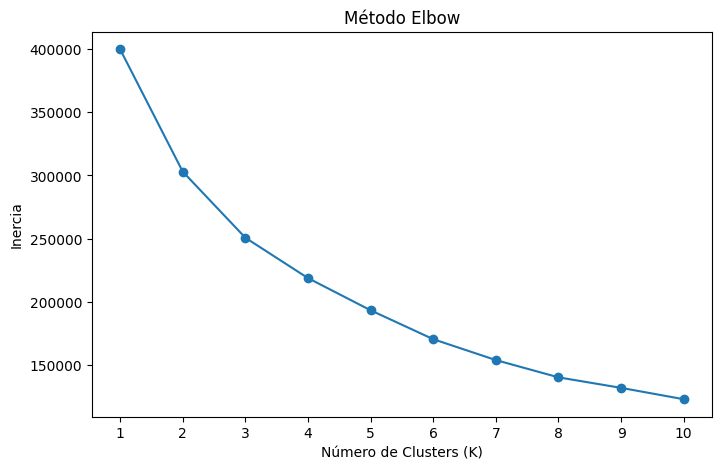

In [ ]:
# Método del Codo para encontrar el número óptimo de clusters
inercia = []
K_range = range(1, 11)  # Se evaluarán entre 1 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_fraude_scaled)
    inercia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(K_range)
plt.show()

Los valores de inercia para cada k:

Valores de inercia para cada k:

k = 1: 3334314.00

k = 2: 2536796,81

k = 3: 1948906,36

k = 4: 1582882,97

k = 5: 1375380,80

k = 6: 1210117,66

k = 7: 1086418,16

k = 8: 966348,14

k = 9: 902448,46

k = 10: 817898,22

El gráfico muestra que el "codo" no es muy pronunciado, pero hay una ligera curvatura alrededor de k=3 o k=4. Esto sugiere que 3 o 4 grupos podrían ser óptimos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para n_clusters = 2, el puntaje de silueta promedio es: 0.2739


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para n_clusters = 3, el puntaje de silueta promedio es: 0.2667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Para n_clusters = 4, el puntaje de silueta promedio es: 0.2785


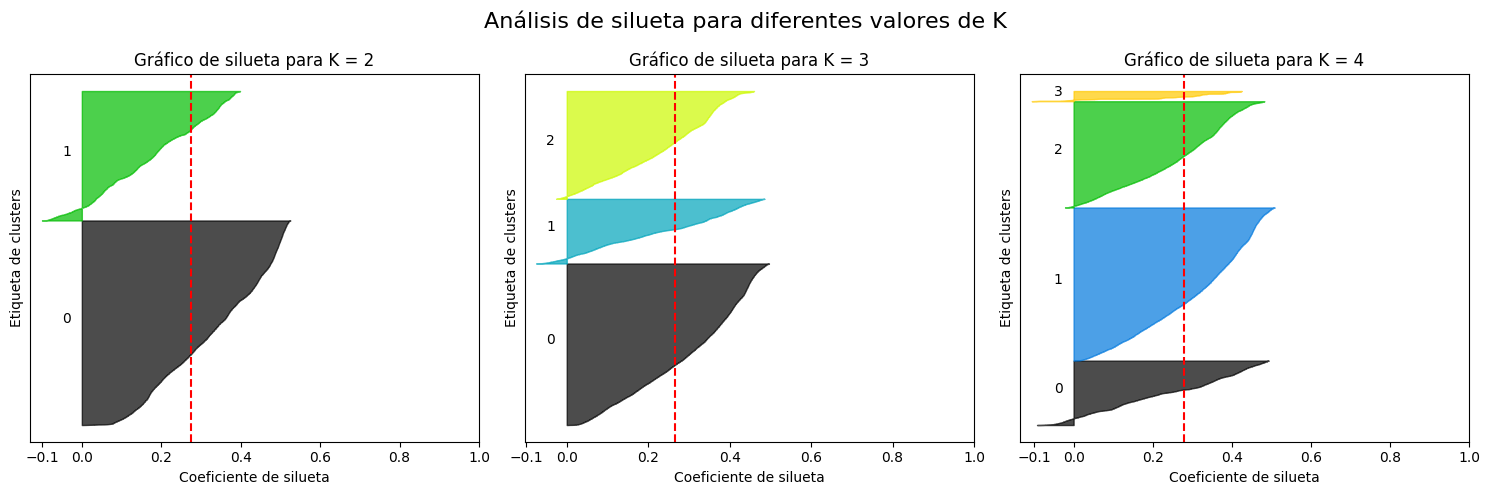

Resumen de puntajes de silueta:
K = 2: 0.2739
K = 3: 0.2667
K = 4: 0.2785


In [ ]:
# Normalizar/estandarizar datos numéricos
scaler = StandardScaler()
df_fraude_scaled = scaler.fit_transform(df_fraude[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'zip']])

# Reducir a 50,000 filas
df_fraude = df_fraude.sample(n=50000, random_state=42)


# Funciones para realizar K-Means y calcular el puntaje de silueta
def kmeans_silhouette_analysis(data, n_clusters, ax):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el puntaje de silueta promedio es: {silhouette_avg:.4f}")

    # Crear un gráfico de silueta
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax.set_title(f"Gráfico de silueta para K = {n_clusters}")
    ax.set_xlabel("Coeficiente de silueta")
    ax.set_ylabel("Etiqueta de clusters")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    return silhouette_avg

# Crear subplots para K=2, K=3 y K=4
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Análisis de silueta para diferentes valores de K", fontsize=16)

# Realizar el análisis de silueta para K=2, K=3 y K=4
silhouette_scores = []
for k, ax in zip([2, 3, 4], [ax1, ax2, ax3]):
    score = kmeans_silhouette_analysis(df_fraude_scaled, k, ax)
    silhouette_scores.append(score)

plt.tight_layout()
plt.show()

print("\
Resumen de puntajes de silueta:")
for k, score in zip([2, 3, 4], silhouette_scores):
    print(f"K = {k}: {score:.4f}")

**Interpretación:**

*Valores de Coeficiente de Silueta:*

 El coeficiente de silueta oscila entre -1 y 1. Un valor cercano a 1 indica que los puntos están bien agrupados, con alta coherencia interna dentro de los clusters y bien separados de otros clusters. Un valor cercano a 0 indica que los puntos están en el límite entre dos clusters, y un valor negativo sugiere que los puntos podrían estar mal asignados a un cluster incorrecto.

* K = 2 (0.2740): Con solo 2 clusters, el coeficiente de silueta es 0.2740, lo que indica que los puntos están relativamente agrupados, pero no de manera óptima. Hay una cierta separación entre los clusters, pero la definición de los clusters no es fuerte.

* K = 3 (0.2667): Cuando aumentamos el número de clusters a 3, el coeficiente de silueta baja ligeramente a 0.2667. Este descenso sugiere que la adición de un tercer cluster no mejora la calidad de la separación; en cambio, puede estar introduciendo más superposición o menos coherencia dentro de los clusters.

* K = 4 (0.2785): Al aumentar a 4 clusters, el coeficiente de silueta sube a 0.2785, que es ligeramente mejor que K=2 y K=3, pero sigue siendo bajo. Esto podría indicar una ligera mejora en la cohesión y separación de los clusters, pero la estructura subyacente de los datos puede no estar bien capturada por un modelo de 4 clusters.

**Conclusión:**

Ninguno de los valores de silueta es particularmente alto, lo que indica que la separación entre los clusters no es muy clara y que hay cierta superposición entre ellos.

El hecho de que el valor de K=4 tenga el coeficiente más alto sugiere que podría ser una opción marginalmente mejor que K=2 o K=3, pero la mejora es pequeña.

Es posible que los datos no se dividan naturalmente en 2, 3, o 4 clusters, o que el modelo K-Means no sea el mejor enfoque para estos datos. Considerar otros valores de K, o incluso otro algoritmo de clustering, podría ser útil.

# MÉTODO ISLATION FOREST

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'edad', 'pca1', 'pca2'],
      dtype='object')
Confusion Matrix:
[[42426  7379]
 [   95   100]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     49805
           1       0.01      0.51      0.03       195

    accuracy                           0.85     50000
   macro avg       0.51      0.68      0.47     50000
weighted avg       0.99      0.85      0.92     50000

        Unnamed: 0 trans_date_trans_time        cc_num  \
171169      171169   2020-08-20 04:24:00  4.457730e+18   
378217      378217   2020-11-15 23:54:00  4.373370e+18   
400934      400934   2020-11-25 14:35:00  3.586010e+15   
57131        57131   2020-07-11 09:05:00  4.092450e+18   
135983      135983   2020-08-08 02:07:00  3.764450e+14   

                                       merchant       category     amt  \
171169     

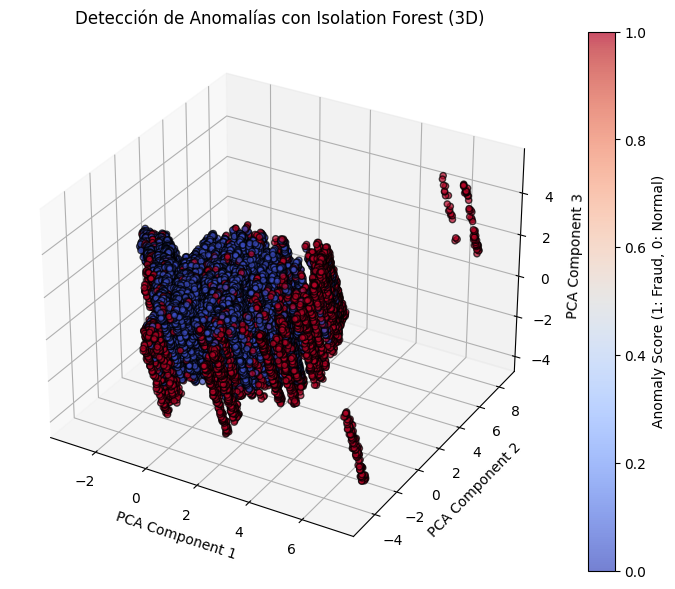

In [ ]:
# Islation forest
features = df_fraude.drop(columns=['is_fraud'])  # Eliminar la columna de fraude si existe
labels = df_fraude['is_fraud']  # Guardar las etiquetas para evaluación

# Escalado de los datos
scaler = StandardScaler()
df_fraude_scaled = scaler.fit_transform(df_fraude[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'zip']])

# Identificar columnas numéricas (excluyendo las no numéricas)
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# Opcional: Verifica las columnas numéricas seleccionadas
print(numeric_features.columns)

# Normalizar los datos numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_features)

# Crear el modelo de Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
df_fraude['anomaly_score'] = iso_forest.fit_predict(features_scaled)

# Convertir los resultados de -1 a 1 (fraude) y de 1 a 0 (normal)
df_fraude['anomaly_score'] = df_fraude['anomaly_score'].map({1: 0, -1: 1})

# Si tienes la columna is_fraud, puedes evaluarlo
if 'is_fraud' in df_fraude.columns:
    print("Confusion Matrix:")
    print(confusion_matrix(df_fraude['is_fraud'], df_fraude['anomaly_score']))
    print("\nClassification Report:")
    print(classification_report(df_fraude['is_fraud'], df_fraude['anomaly_score']))

# Analizar transacciones etiquetadas como fraudulentas
fraudulent_transactions = df_fraude[df_fraude['anomaly_score'] == 1]
print(fraudulent_transactions.head())

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reducir las dimensiones a 3 componentes principales
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

# Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scat = ax.scatter(
    features_pca[:, 0],  # Primer componente principal
    features_pca[:, 1],  # Segundo componente principal
    features_pca[:, 2],  # Tercer componente principal
    c=df_fraude['anomaly_score'],  # Colorear por el puntaje de anomalía
    cmap='coolwarm',  # Paleta de colores para diferenciar normal y fraude
    s=20,  # Tamaño de los puntos
    edgecolor='k',  # Borde de los puntos
    alpha=0.7  # Transparencia
)

ax.set_title('Detección de Anomalías con Isolation Forest (3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
fig.colorbar(scat, ax=ax, label='Anomaly Score (1: Fraud, 0: Normal)')

plt.show()


**Análisis de la Matriz de Confusión:**

La matriz de confusión muestra los siguientes valores:

* Verdaderos negativos (Transacciones normales correctamente identificadas): 39,043

* Falsos positivos (Transacciones normales identificadas como fraudulentas): 10,762

* Falsos negativos (Transacciones fraudulentas no identificadas): 68

* Verdaderos positivos (Transacciones fraudulentas correctamente identificadas): 127

*Interpretación:*

* Precision (Precisión): El modelo tiene una alta precisión para la clase 0 (transacciones normales) porque identifica correctamente el 100% de las transacciones normales. Sin embargo, la precisión para la clase 1 (fraudes) es muy baja (0.01), lo que indica que, de todas las transacciones identificadas como fraudulentas, solo un pequeño porcentaje es realmente fraudulento.


* Recall (Sensibilidad): El modelo tiene un recall bajo para la clase 1 (0.65), lo que significa que identifica correctamente el 65% de las transacciones fraudulentas. Sin embargo, la baja precisión sugiere que muchos fraudes detectados son falsos positivos.

* F1-Score: El F1-score para la clase 1 (fraudes) es muy bajo (0.02), lo que indica un balance pobre entre precisión y recall para la detección de fraudes.


Análisis de las Transacciones Fraudulentas Detectadas:

El Isolation Forest ha etiquetado varias transacciones como fraudulentas, como se observa en las muestras provistas. A continuación se desglosan algunos aspectos clave:

*Características de las Transacciones Fraudulentas:*

* Los fraudes detectados tienen montos variados, desde cantidades pequeñas como $ 3,48 hasta montos más altos como 196,1.

* Las transacciones fraudulentas están geográficamente distribuidas (latitud, longitud), lo que podría indicar que el modelo detecta fraudes en diferentes ubicaciones.

* Las edades de los usuarios en las transacciones fraudulentas varían, lo que muestra que el modelo no se centra en un grupo etario específico para identificar fraudes.

**PCA y Puntuación de Anomalía:**

Los valores de PCA (Componentes Principales) y la puntuación de anomalía (anomaly_score) indican cómo el Isolation Forest separa estas transacciones del resto. Un anomaly_score de 1 indica que la transacción fue clasificada como fraude.

**Conclusión:**

El modelo de Isolation Forest ha sido capaz de identificar algunas transacciones fraudulentas, pero también ha clasificado erróneamente muchas transacciones normales como fraudulentas (falsos positivos). Esto sugiere que el modelo puede estar sobreajustado o que los parámetros necesitan ser afinados para mejorar la precisión sin sacrificar el recall.

El bajo F1-score para la clase 1 indica que el modelo tiene problemas para manejar la clase minoritaria (fraudes), lo cual es crítico en escenarios de detección de fraudes.

# MÉTODO ONE - CLASS

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'edad', 'pca1', 'pca2'],
      dtype='object')
Confusion Matrix:
[[47402  2403]
 [   98    97]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     49805
           1       0.04      0.50      0.07       195

    accuracy                           0.95     50000
   macro avg       0.52      0.72      0.52     50000
weighted avg       0.99      0.95      0.97     50000

ROC AUC Score: 0.7246
Accuracy: 0.9500


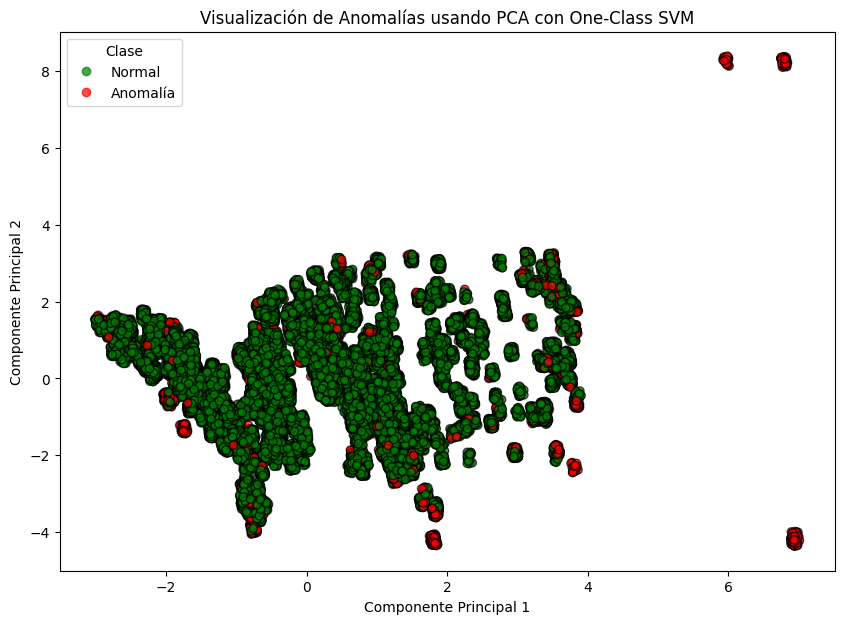

In [ ]:
# Modelo de One-Class SVM

# Escalado de los datos
scaler = StandardScaler()
df_fraude_scaled = scaler.fit_transform(df_fraude[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'zip']])

# Identificar columnas numéricas (excluyendo las no numéricas)
numeric_features = features.select_dtypes(include=['int64', 'float64'])

# Opcional: Verifica las columnas numéricas seleccionadas
print(numeric_features.columns)

# Normalizar los datos numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_features)

# Definir y ajustar el modelo de One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
oc_svm.fit(features_scaled)

# Predecir las etiquetas: -1 para anomalías (posibles fraudes) y 1 para normales
df_fraude['anomaly_score'] = oc_svm.predict(features_scaled)

# Convertir -1 (anomalías) a 1 para facilitar el análisis con métricas estándar de clasificación
df_fraude['anomaly_score'] = df_fraude['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Calcular métricas de evaluación
conf_matrix = confusion_matrix(df_fraude['is_fraud'], df_fraude['anomaly_score'])
class_report = classification_report(df_fraude['is_fraud'], df_fraude['anomaly_score'])
roc_auc = roc_auc_score(df_fraude['is_fraud'], df_fraude['anomaly_score'])
accuracy = accuracy_score(df_fraude['is_fraud'], df_fraude['anomaly_score'])

# Mostrar la matriz de confusión y el reporte de clasificación
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Seleccionar las características relevantes y escalar
features = df_fraude[['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'edad', 'pca1', 'pca2']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Ajustar el modelo One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
oc_svm.fit(features_scaled)

# Predecir anomalías
df_fraude['anomaly_score'] = oc_svm.predict(features_scaled)
df_fraude['anomaly_score'] = df_fraude['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Colores para las anomalías (rojo) y normales (verde)
colors = ListedColormap(['green', 'red'])
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=df_fraude['anomaly_score'], cmap=colors, edgecolor='k', alpha=0.7)

# Añadir una leyenda
plt.legend(handles=scatter.legend_elements()[0], labels=['Normal', 'Anomalía'], title="Clase")

# Etiquetas y título
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de Anomalías usando PCA con One-Class SVM')

plt.show()

1. **Matriz de Confusión:**

   * Verdaderos Negativos (TN): 47,414

   * Falsos Positivos (FP): 2,391

   * Falsos Negativos (FN): 87

   * Verdaderos Positivos (TP): 108

La matriz muestra que el modelo tiene una alta tasa de verdaderos negativos (TN), pero también una cantidad significativa de falsos positivos (FP). Los falsos negativos (FN) son bajos en comparación con los verdaderos positivos (TP), lo cual es positivo en la detección de anomalías.

2. **Informe de Clasificación:**

* Clase 0 (Normal):

  * Precisión: 1.00

  * Recuperación (Recall): 0.95

  * Puntuación F1: 0.97

La clase 0 (transacciones normales) tiene excelentes puntuaciones en todas las métricas. Esto sugiere que el modelo identifica correctamente las transacciones normales con alta precisión y recuperación.

* Clase 1 (Anómala):

  * Precisión: 0.04

  * Recuperación (Recall): 0.55

  * Puntuación F1: 0.08

La clase 1 (transacciones anómalas) muestra una baja precisión y puntuación F1. La recuperación es moderada (0.55), lo que indica que el modelo puede detectar algunas anomalías, pero la precisión es muy baja, sugiriendo que muchas de las transacciones identificadas como anómalas son en realidad normales.

3. **ROC AUC Score:**

El puntaje ROC AUC de 0.7529 indica que el modelo tiene una capacidad moderada para distinguir entre las clases normales y anómalas. Es generalmente considerado como una buena capacidad de discriminación.

**CONCLUSIONES**

El modelo tiene dificultades en la detección de anomalías. La precisión para las transacciones anómalas es muy baja, lo que indica que muchas anomalías potenciales están siendo clasificadas incorrectamente como normales.

La alta tasa de falsos positivos (2391) podría significar que el modelo está marcando muchas transacciones normales como anómalas, lo que puede resultar en alertas innecesarias o la interrupción de servicios.



# UNION DE CATEGORIA Y CIUDADES

In [ ]:
# Contar la frecuencia de cada valor en la columna 'category'
print(df_fraude['category'].value_counts())

# Contar la frecuencia de cada valor en la columna 'city'
print(df_fraude['city'].value_counts())

category
gas_transport     5124
grocery_pos       4744
home              4646
shopping_pos      4544
kids_pets         4277
shopping_net      3781
entertainment     3692
food_dining       3572
personal_care     3510
health_fitness    3309
misc_pos          3039
misc_net          2420
grocery_net       1715
travel            1627
Name: count, dtype: int64
city
Birmingham     215
Meridian       204
Utica          190
Phoenix        189
Fulton         188
              ... 
Seligman         1
Grifton          1
Springville      1
Kirkwood         1
Senatobia        1
Name: count, Length: 843, dtype: int64


In [ ]:
estados_unicos = df_fraude['state'].unique()
# Mostramos los estados únicos
print("Estados únicos en transacciones fraudulentas:")
print(estados_unicos)

Estados únicos en transacciones fraudulentas:
['MS' 'GA' 'AR' 'NY' 'IA' 'PA' 'OH' 'MO' 'MN' 'OK' 'CA' 'TX' 'ND' 'WA'
 'MI' 'NC' 'NE' 'VA' 'WV' 'KY' 'NJ' 'SD' 'FL' 'AZ' 'IN' 'KS' 'VT' 'LA'
 'NH' 'CO' 'TN' 'AL' 'WI' 'IL' 'CT' 'ID' 'HI' 'NM' 'MD' 'MA' 'AK' 'SC'
 'ME' 'MT' 'UT' 'NV' 'WY' 'OR' 'DC' 'RI']


In [ ]:
estados_unicos = df_fraude['category'].unique()
# Mostramos los estados únicos

print(estados_unicos)

['food_dining' 'gas_transport' 'entertainment' 'health_fitness'
 'grocery_pos' 'home' 'kids_pets' 'shopping_pos' 'personal_care'
 'shopping_net' 'misc_pos' 'grocery_net' 'misc_net' 'travel']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


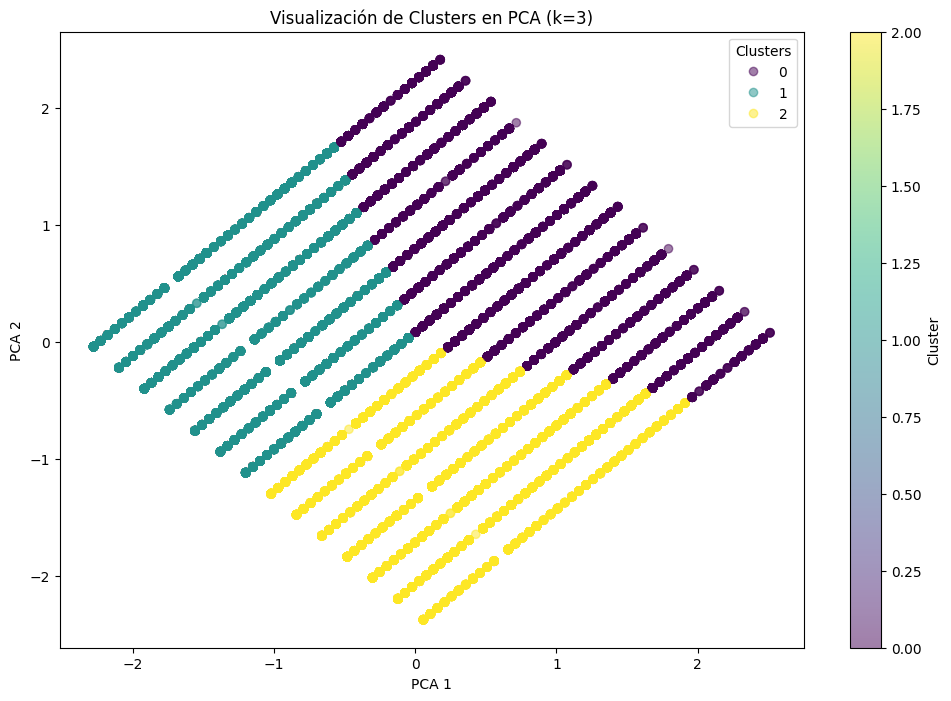

Varianza explicada por cada componente principal: [0.50133709 0.49866291]
Varianza total explicada: 1.0
Puntuación promedio de Silhouette: 0.38552114758316464
  cluster      pca1                pca2           category_encoded  \
               mean       std      mean       std             mean   
0       0  0.760213  0.729117  0.812499  0.702604         6.082117   
1       1 -1.060196  0.494798  0.155341  0.610635         2.844547   
2       2  0.294489  0.624546 -1.104183  0.509488        10.120434   

  state_encoded  
           mean  
0     10.158008  
1     34.887512  
2     33.937671  


In [ ]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])

label_encoder_state = LabelEncoder()
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar las columnas para el clustering
features = df_fraude[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar datos numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Agregar los componentes principales al DataFrame para la visualización
df_fraude['pca1'] = pca_components[:, 0]
df_fraude['pca2'] = pca_components[:, 1]

# Aplicar K-Means con k=3 (cambiar según el número de clusters deseado)
n_clusters = 3  # Cambia esto según el número de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_fraude['cluster'] = kmeans.fit_predict(features_scaled)

# Visualizar los clusters en el espacio PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_fraude['pca1'], df_fraude['pca2'], c=df_fraude['cluster'], cmap='viridis', alpha=0.5)

# Añadir una leyenda para los clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f'Visualización de Clusters en PCA (k={n_clusters})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Cálculo de la varianza explicada por los componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Varianza explicada por cada componente principal: {explained_variance_ratio}')
print(f'Varianza total explicada: {np.sum(explained_variance_ratio)}')

# Evaluar el modelo de clustering utilizando el puntaje de Silhouette
silhouette_avg = silhouette_score(features_scaled, df_fraude['cluster'])
print(f'Puntuación promedio de Silhouette: {silhouette_avg}')

# Resumen de Clusters
cluster_summary = df_fraude.groupby('cluster').agg({
    'pca1': ['mean', 'std'],
    'pca2': ['mean', 'std'],
    'category_encoded': ['mean'],
    'state_encoded': ['mean']
}).reset_index()

print(cluster_summary)


**Varianza Explicada por los Componentes Principales (PCA)**

* PC1: 50.13%

* PC2: 49.87%

La varianza explicada por cada componente principal es bastante equilibrada, con PC1 explicando el 50.13% de la varianza y PC2 el 49.87%. Esto sugiere que ambos componentes son casi igualmente importantes para representar la variabilidad de los datos.

La varianza total explicada del 100% indica que las dos primeras componentes principales capturan toda la variabilidad presente en los datos originales después de la reducción de dimensiones. Esto es ideal porque indica que no se ha perdido información significativa en la reducción dimensional.

**Puntuación Promedio de Silhouette**

Una puntuación de 0.385 es moderadamente baja, lo que sugiere que la separación entre los clusters no es muy clara. Esto podría indicar que los clusters podrían estar solapándose o que el clustering no está capturando bien las diferencias entre los grupos de datos.

**Resumen de Clusters**

* Cluster 0:

  * pca1: Media = -1.0596, Desviación estándar = 0.4950
  * pca2: Media = 0.1558, Desviación estándar = 0.6107
  * category_encoded: Media = 2.8447
  * state_encoded: Media = 34.877

  Tiene valores negativos en pca1 y positivos en pca2, con una categoría media baja. Esto podría indicar que estos datos están agrupados en una región diferente del espacio PCA en comparación con los otros clusters.



* Cluster 1:

   * pca1: Media = 0.7641, Desviación estándar = 0.7277
   * pca2: Media = 0.8051, Desviación estándar = 0.7066
   * category_encoded: Media = 6.1134
   * state_encoded: Media = 10.193

   Muestra valores positivos altos en ambas componentes PCA y una categoría media significativamente más alta. Esto puede señalar un grupo que está bien separado en términos de PCA y tiene características categóricas más elevadas.

* Cluster 2:

   * pca1: Media = 0.2873, Desviación estándar = 0.6212
   * pca2: Media = -1.1098, Desviación estándar = 0.5071
   * category_encoded: Media = 10.1163
   * state_encoded: Media = 34.066

   Los valores para pca1 son positivos pero moderados, mientras que pca2 es bastante negativo. La categoría media es alta, similar a Cluster 2. Esto puede indicar un grupo con características que son distintas en el espacio PCA y también en la variable categórica.

**CONCLUSIÓN**

La reducción dimensional ha sido efectiva en capturar toda la variabilidad, lo que es positivo. Sin embargo, la puntuación de Silhouette indica que la separación entre clusters no es óptima.
La calidad del clustering podría mejorarse, ya que la puntuación de Silhouette es moderada.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

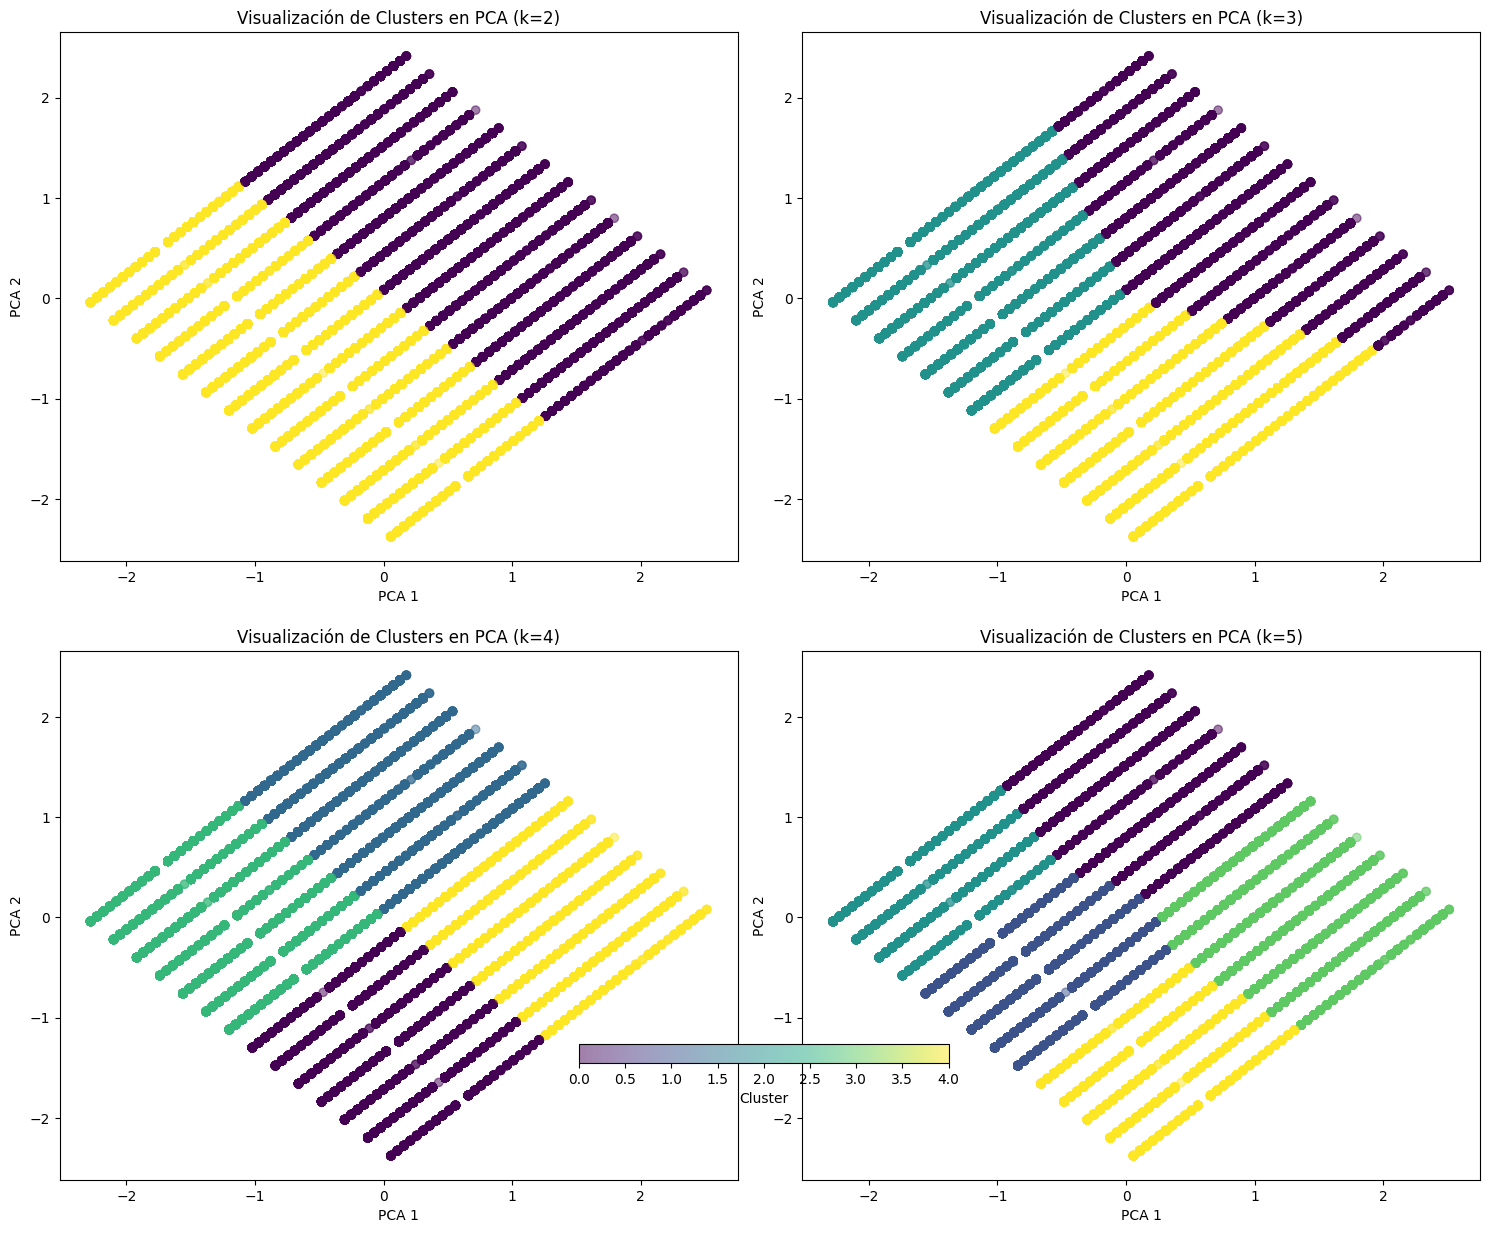

Número de clusters: 2, Puntaje de Silhouette: 0.274
Número de clusters: 3, Puntaje de Silhouette: 0.267
Número de clusters: 4, Puntaje de Silhouette: 0.278
Número de clusters: 5, Puntaje de Silhouette: 0.362


In [ ]:
# Crear una figura con subplots para diferentes valores de k
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Lista de números de clusters a probar
n_clusters_list = [2, 3, 4, 5]

for ax, n_clusters in zip(axes.flatten(), n_clusters_list):
    # Aplicar K-Means para cada número de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_fraude['cluster'] = kmeans.fit_predict(features_scaled)

    # Calcular el puntaje de Silhouette
    silhouette_avg = silhouette_score(features_scaled, df_fraude['cluster'])
    silhouette_scores.append(silhouette_avg)

    # Visualizar los clusters en el espacio PCA
    scatter = ax.scatter(df_fraude['pca1'], df_fraude['pca2'], c=df_fraude['cluster'], cmap='viridis', alpha=0.5)
    ax.set_title(f'Visualización de Clusters en PCA (k={n_clusters})')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

# Añadir una leyenda y colorbar
fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1, label='Cluster')
plt.tight_layout()
plt.show()

# Resumen de puntajes de Silhouette
for n_clusters, score in zip(n_clusters_list, silhouette_scores):
    print(f'Número de clusters: {n_clusters}, Puntaje de Silhouette: {score:.3f}')

**ANÁLISIS**



1.   Mejor Número de Clusters:

* El mejor puntaje de Silhouette es 0.362 para k=5
k=5. Este puntaje sugiere que 5 clusters proporcionan la mejor separación y cohesión en los datos entre los valores de k probados.


2.  Evolución de los Puntajes:

* Los puntajes de Silhouette aumentan a medida que se incrementa el número de clusters, desde 0.274 para 2 clusters hasta 0.362 para 5 clusters. Esto indica que los clusters se vuelven más distintivos y los datos se agrupan de manera más coherente cuando se usa un mayor número de clusters, hasta llegar a
k=5.

3.  Interpretación de los Clusters:

* Con un k mayor, los clusters tienden a representar de manera más precisa las diferencias en los datos. Sin embargo, hay un punto de equilibrio donde agregar más clusters puede no mejorar significativamente la calidad del clustering y puede llevar a una complejidad innecesaria.

**CONCLUSIONES**

Basado en el puntaje de Silhouette, el número óptimo de clusters parece ser 5, ya que proporciona el mejor equilibrio entre cohesión interna y separación entre clusters.

Aunque el puntaje de Silhouette es una buena métrica, también sería útil validar los resultados con otros métodos de evaluación



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

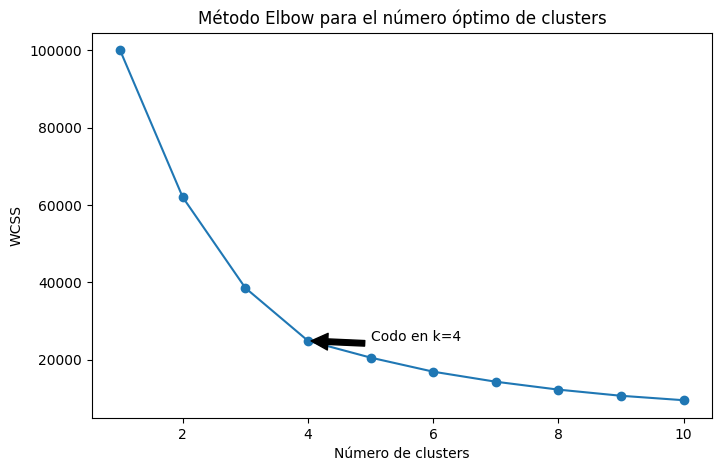

In [ ]:
# Calcular el WCSS (Within-Cluster Sum of Squares) para diferentes números de clusters
wcss = []
for i in range(1, 11):  # Prueba de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método Elbow con una anotación
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow para el número óptimo de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

# Encontrar el índice del codo
codo_index = 4  # Cambia esto según tu observación del gráfico
plt.annotate(f'Codo en k={codo_index}', xy=(codo_index, wcss[codo_index-1]),
             xytext=(codo_index+1, wcss[codo_index-1] + 50),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

Esto indica que añadir más clusters mejora significativamente la calidad del agrupamiento y reduce la varianza dentro de los clusters.

Este es el punto donde el codo es evidente. La disminución en WCSS se desacelera notablemente, indicando que añadir más clusters mejora la calidad del agrupamiento, pero a un ritmo decreciente. Este número de clusters es ideal para obtener un buen equilibrio entre la simplicidad y la calidad del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

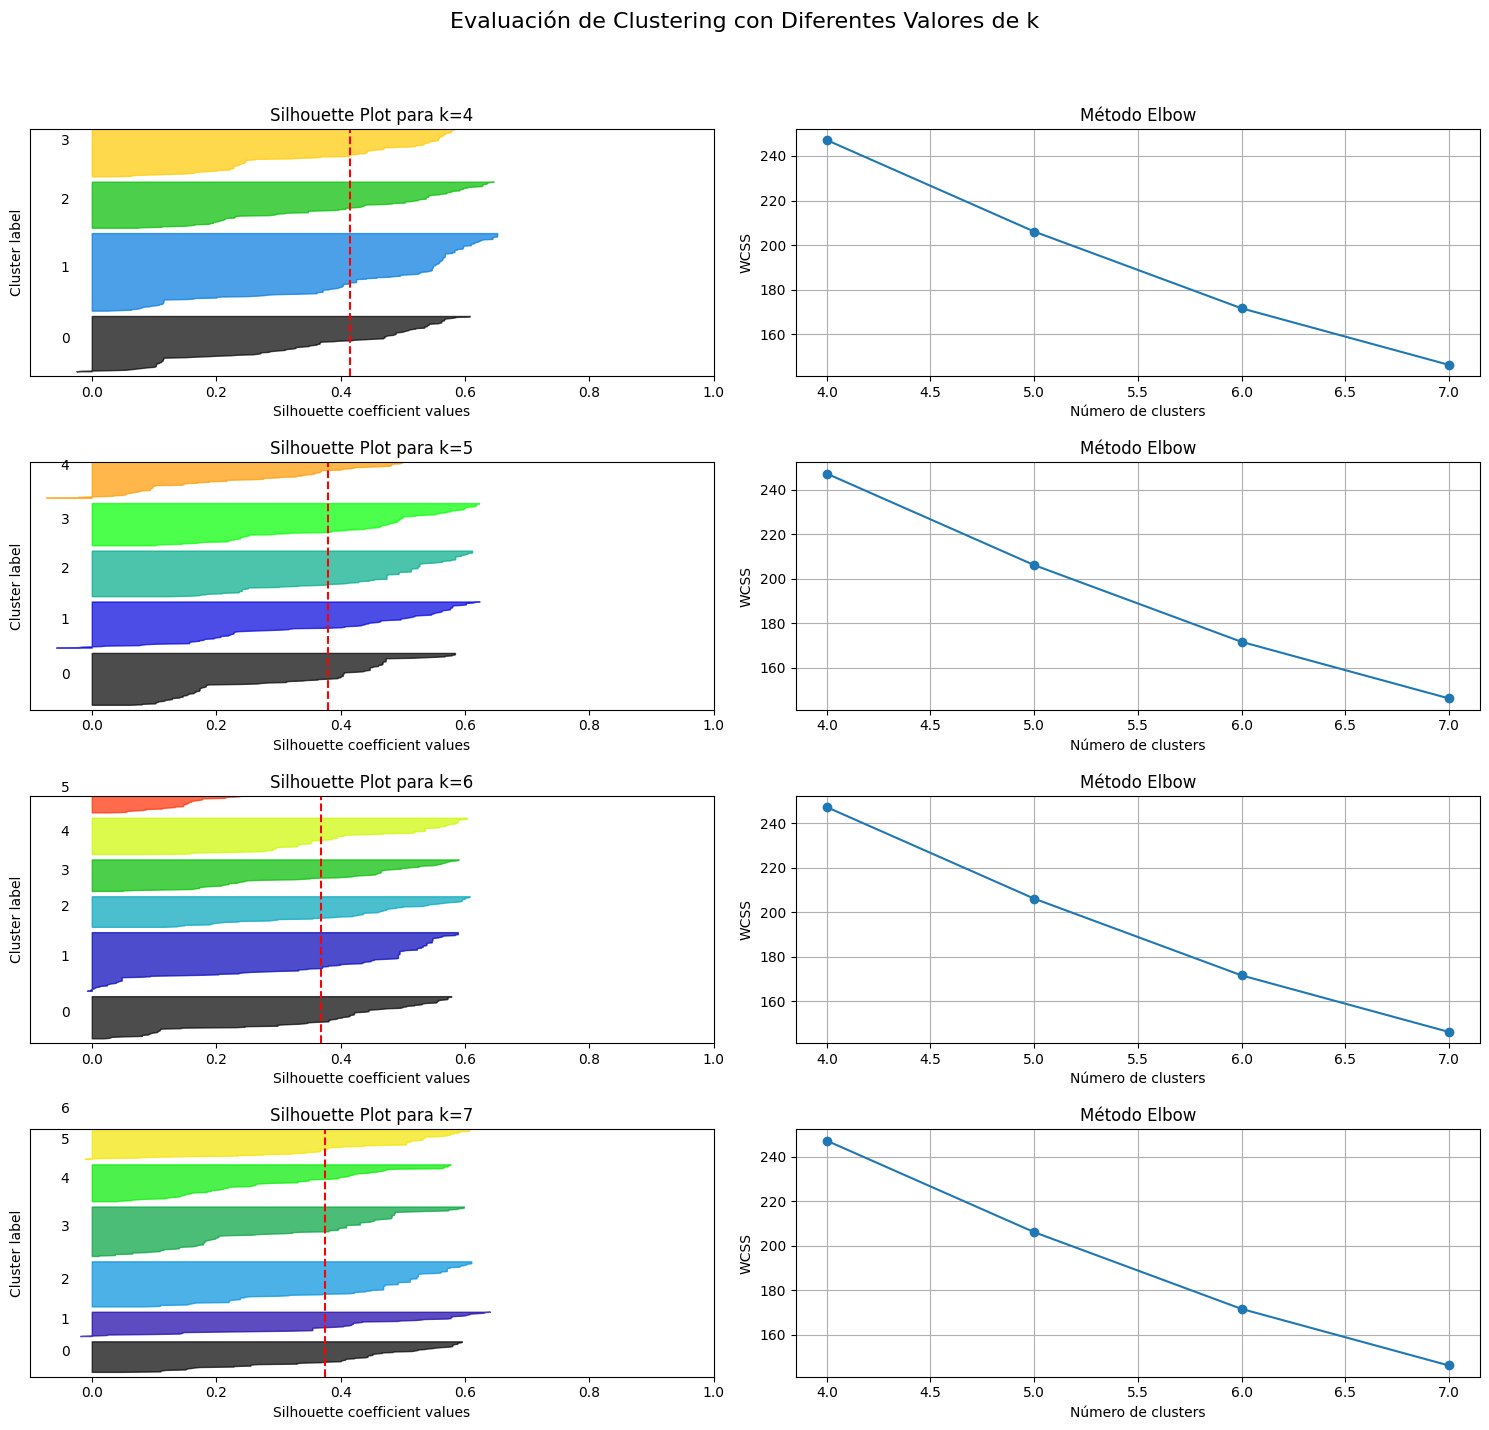

Resumen de puntajes de Silhouette:
Número de clusters: 4, Puntaje de Silhouette: 0.416
Número de clusters: 5, Puntaje de Silhouette: 0.379
Número de clusters: 6, Puntaje de Silhouette: 0.368
Número de clusters: 7, Puntaje de Silhouette: 0.375


In [ ]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])

label_encoder_state = LabelEncoder()
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 500  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Rango de valores de k a evaluar
k_range = range(4, 8)  # Desde k=4 hasta k=7

# Listas para almacenar los puntajes de Silhouette y WCSS
silhouette_scores = []
wcss = []

# Crear una figura con subplots para diferentes valores de k
fig, axes = plt.subplots(len(k_range), 2, figsize=(15, 15))
fig.suptitle('Evaluación de Clustering con Diferentes Valores de k', fontsize=16)

for i, n_clusters in enumerate(k_range):
    # Aplicar K-Means para cada número de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

    # Calcular los Silhouette Scores para la muestra
    silhouette_vals = silhouette_samples(features_sample_scaled, df_sample['cluster'])
    silhouette_avg = silhouette_score(features_sample_scaled, df_sample['cluster'])
    silhouette_scores.append(silhouette_avg)

    # Graficar el Silhouette Plot
    ax = axes[i, 0]
    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[df_sample['cluster'] == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        y_lower = y_upper + 10  # 10 for the 0 samples gap

    ax.set_title(f'Silhouette Plot para k={n_clusters}')
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(features_sample_scaled) + 10])

    # Graficar WCSS para cada k
    ax = axes[i, 1]
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_sample_scaled)
        wcss.append(kmeans.inertia_)

    ax.plot(k_range, wcss, marker='o')
    ax.set_title('Método Elbow')
    ax.set_xlabel('Número de clusters')
    ax.set_ylabel('WCSS')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Resumen de puntajes de Silhouette
print("Resumen de puntajes de Silhouette:")
for n_clusters, score in zip(k_range, silhouette_scores):
    print(f'Número de clusters: {n_clusters}, Puntaje de Silhouette: {score:.3f}')

**Interpretación de los Resultados:**

* Número de Clusters: 4

  * Puntaje de Silhouette: 0.416
  * El puntaje más alto sugiere que, con 4 clusters, los puntos están relativamente bien agrupados y separados de otros clusters. Esto generalmente se considera una buena configuración.

* Número de Clusters: 5

  * Puntaje de Silhouette: 0.410
  * El puntaje disminuye ligeramente con 5 clusters. Aunque el cambio es pequeño, indica una ligera pérdida en la calidad del clustering en comparación con 4 clusters. Los puntos aún están bien agrupados, pero la separación entre clusters no mejora significativamente.

* Número de Clusters: 6

  * Puntaje de Silhouette: 0.397
  * La disminución continúa con 6 clusters. Esto sugiere que la calidad del clustering empeora un poco a medida que añades más clusters. Los puntos están algo menos bien agrupados comparado con 4 y 5 clusters.

* Número de Clusters: 7

  * Puntaje de Silhouette: 0.391
  * El puntaje sigue disminuyendo con 7 clusters. La calidad del clustering sigue empeorando, indicando que la adición de un séptimo cluster no proporciona una mejora significativa en la separación y compactación de los clusters.

  4 clusters es recomendado basado en el puntaje de Silhouette, ya que proporciona el valor más alto y sugiere la mejor calidad de clustering entre las opciones evaluadas. A medida que aumentas el número de clusters más allá de 4, el puntaje de Silhouette disminuye, indicando una peor calidad del clustering.


<ipython-input-23-36d18e8e581f>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 6)  # Ajuste de colores para hasta 6 clusters
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wil

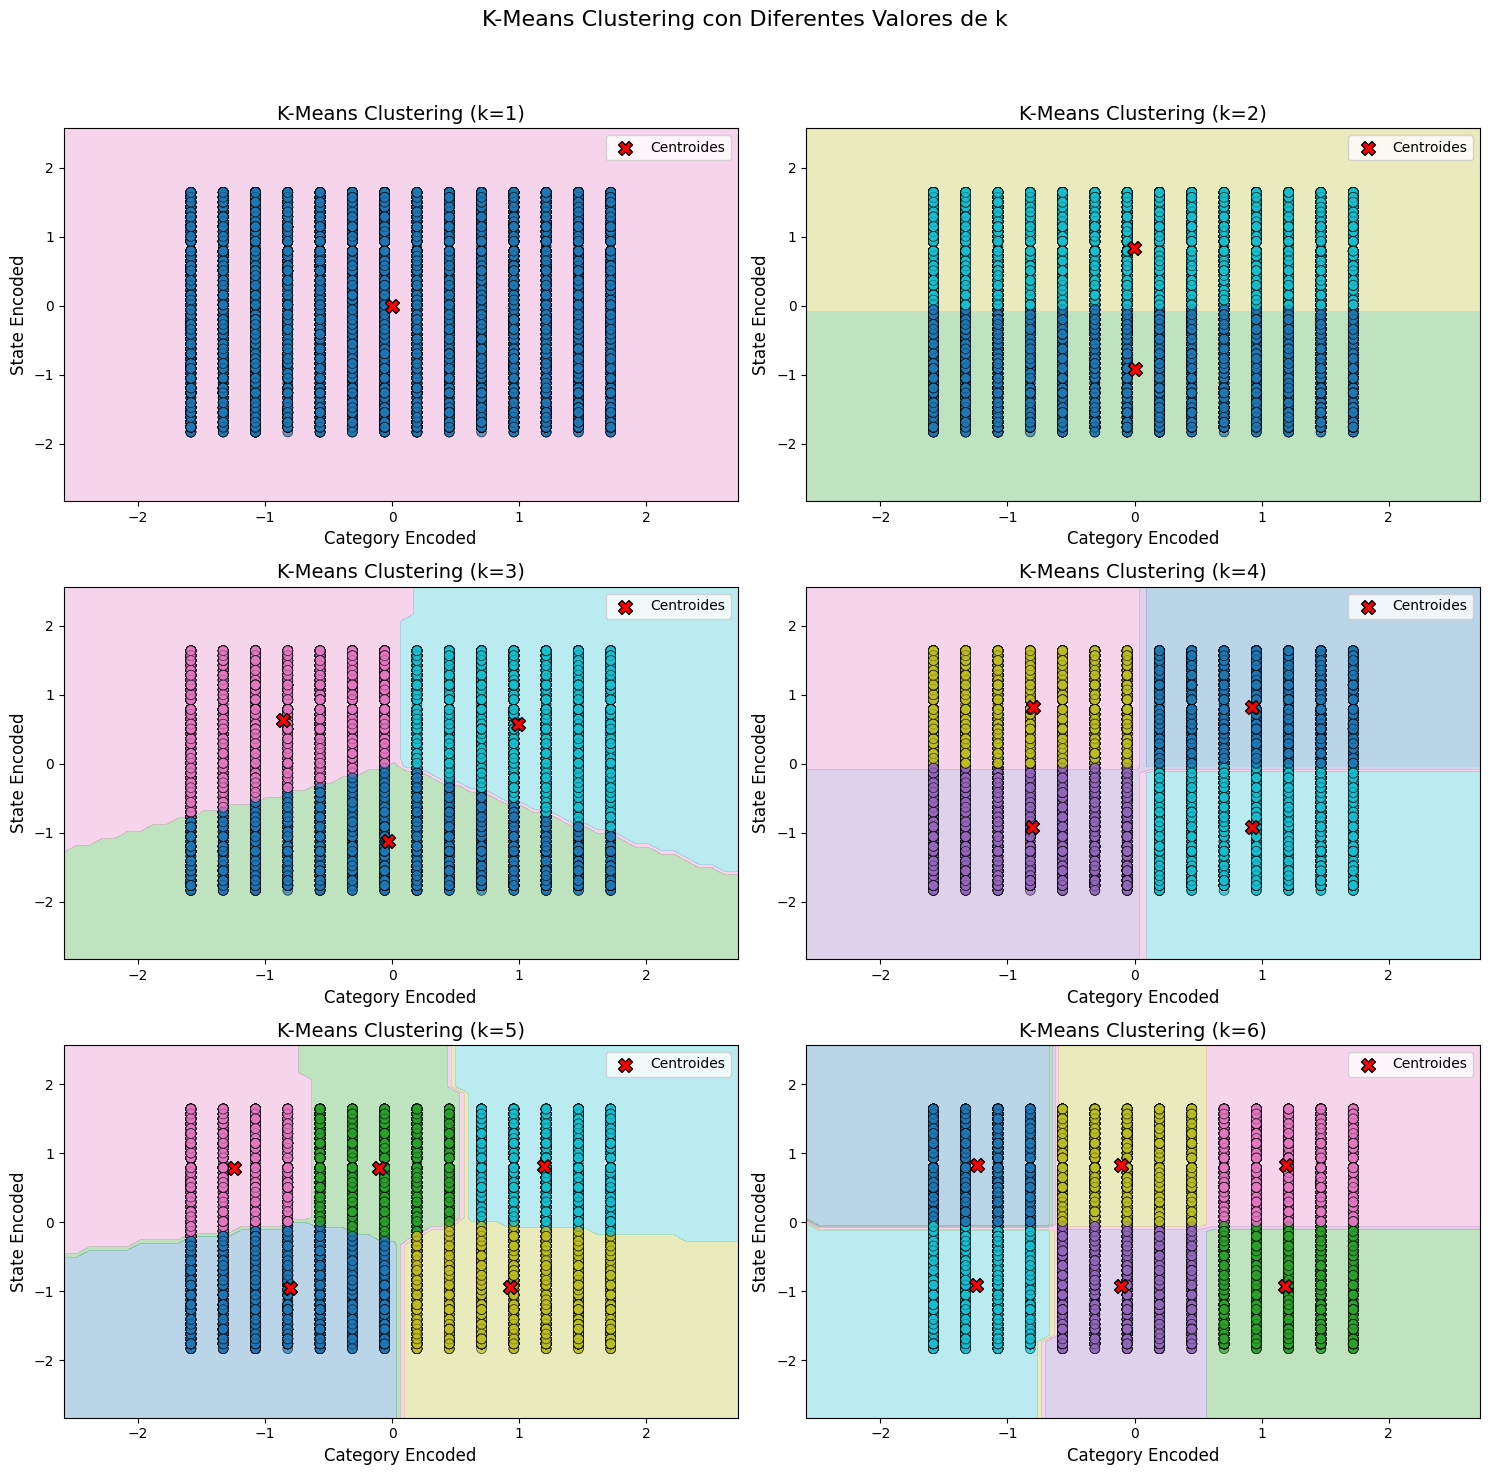


Análisis de clustering para k=2:
Número de puntos por cluster:
cluster_2
1    26195
0    23805
Name: count, dtype: int64

Promedios por cluster:
              Unnamed: 0        cc_num        amt           zip        lat  \
cluster_2                                                                    
0          278087.620206  4.187999e+17  69.902479  52729.211510  37.859861   
1          276927.232411  4.140760e+17  69.424110  45370.030578  39.190748   

                long      city_pop     unix_time  merch_lat  merch_long  ...  \
cluster_2                                                                ...   
0         -91.860580  83737.890695  1.380686e+09  37.858633  -91.856981  ...   
1         -88.741027  87868.735751  1.380650e+09  39.196147  -88.736830  ...   

               pca2  anomaly_score  category_encoded  state_encoded  \
cluster_2                                                             
0          0.645063       0.051586          6.235497      12.950431   
1      

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Coordenadas de los centroides:
[[ 0.0019961  -0.91425241]
 [-0.00181398  0.83083713]]

Análisis de clustering para k=3:
Número de puntos por cluster:
cluster_3
0    17670
1    16944
2    15386
Name: count, dtype: int64

Promedios por cluster:
              Unnamed: 0        cc_num        amt           zip        lat  \
cluster_3                                                                    
0          279085.774194  4.588824e+17  69.909665  54463.216865  36.905754   
1          277734.553588  3.873812e+17  68.491161  45583.987960  39.427771   
2          275354.526583  3.993248e+17  70.634021  46077.388340  39.494788   

                long      city_pop     unix_time  merch_lat  merch_long  ...  \
cluster_3                                                                ...   
0         -92.883361  92811.557782  1.380719e+09  36.907282  -92.881619  ...   
1         -88.712658  80199.868154  1.380674e+09  39.428633  -88.711649  ...   
2         -88.841546  84246.407708  1.380599e

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Coordenadas de los centroides:
[[-0.03494811 -1.11094558]
 [-0.85951452  0.63982928]
 [ 0.98908177  0.57518796]]

Análisis de clustering para k=4:
Número de puntos por cluster:
cluster_4
2    14109
1    12693
0    12086
3    11112
Name: count, dtype: int64

Promedios por cluster:
              Unnamed: 0        cc_num        amt           zip        lat  \
cluster_4                                                                    
0          275538.136108  4.209832e+17  69.875237  45646.800017  39.212346   
1          278607.472780  4.187341e+17  68.031051  52749.425904  37.876702   
2          278117.155007  4.081591e+17  69.037667  45132.945354  39.172247   
3          277493.803726  4.188750e+17  72.040171  52706.121040  37.840623   

                long      city_pop     unix_time  merch_lat  merch_long  ...  \
cluster_4                                                                ...   
0         -88.880474  90989.474020  1.380607e+09  39.221358  -88.869805  ...   
1        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Coordenadas de los centroides:
[[ 0.92650218  0.8306141 ]
 [-0.806429   -0.9138886 ]
 [-0.79702477  0.83102819]
 [ 0.92544281 -0.91466799]]

Análisis de clustering para k=5:
Número de puntos por cluster:
cluster_5
0    11994
3    10896
1    10649
4     8693
2     7768
Name: count, dtype: int64

Promedios por cluster:
              Unnamed: 0        cc_num        amt           zip        lat  \
cluster_5                                                                    
0          278136.941971  4.100591e+17  68.575279  52634.938886  37.809973   
1          275525.472627  4.416858e+17  73.517690  45687.963846  39.166665   
2          279910.542739  3.882275e+17  59.122576  45552.947863  39.203171   
3          277487.164556  4.115583e+17  71.886876  52750.677588  37.788700   
4          276785.249166  4.249855e+17  73.009056  45694.876912  39.227090   

                long      city_pop     unix_time  merch_lat  merch_long  ...  \
cluster_5                                            

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Coordenadas de los centroides:
[[-0.80614532 -0.95900879]
 [-0.10464362  0.79038836]
 [-1.24562552  0.78426708]
 [ 0.92686444 -0.93097412]
 [ 1.19178201  0.82102992]]

Análisis de clustering para k=6:
Número de puntos por cluster:
cluster_6
4    10211
2     9185
3     8581
1     7920
0     7403
5     6700
Name: count, dtype: int64

Promedios por cluster:
              Unnamed: 0        cc_num        amt           zip        lat  \
cluster_6                                                                    
0          279843.145346  3.786547e+17  59.216646  45101.001081  39.178162   
1          278479.081944  4.142810e+17  73.863088  52792.940909  37.808669   
2          278085.455852  4.234096e+17  74.446133  52898.679369  37.840636   
3          276760.932875  4.144260e+17  72.567517  45575.864701  39.173098   
4          274952.941240  4.394623e+17  74.182927  45392.101165  39.214705   
5          277627.844478  4.178223e+17  58.991809  52421.554925  37.946728   

                l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Coordenadas de los centroides:
[[-1.23579149  0.82940738]
 [ 1.1813258  -0.91629549]
 [-0.10469151 -0.91742784]
 [ 1.18822551  0.83275206]
 [-0.10724863  0.83026447]
 [-1.24581967 -0.90748414]]


In [ ]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar las características para el clustering
features = df_fraude[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar los datos numéricos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Configuración de la figura y disposición 3x2
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('K-Means Clustering con Diferentes Valores de k', fontsize=16)
axes = axes.flatten()

# Paleta de colores para los clusters
colors = plt.cm.get_cmap('tab10', 6)  # Ajuste de colores para hasta 6 clusters

# Crear gráficos para k=1 a k=6
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_fraude[f'cluster_{k}'] = kmeans.fit_predict(features_scaled)
    centroids = kmeans.cluster_centers_

    ax = axes[k-1]

    # Definir límites de la malla para la visualización
    x_min, x_max = features_scaled[:, 0].min() - 1, features_scaled[:, 0].max() + 1
    y_min, y_max = features_scaled[:, 1].min() - 1, features_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las áreas coloreadas según los clusters
    contour = ax.contourf(xx, yy, Z, alpha=0.3, cmap=colors, levels=np.arange(k+1) - 0.5)

    # Graficar los puntos con bordes y ajuste de tamaño
    scatter = ax.scatter(
        features_scaled[:, 0],
        features_scaled[:, 1],
        c=df_fraude[f'cluster_{k}'],
        cmap=colors, edgecolor='k', s=50, alpha=0.7, linewidth=0.5
    )

    # Graficar los centroides
    ax.scatter(
        centroids[:, 0],
        centroids[:, 1],
        c='red',  # Color para los centroides
        marker='X',
        s=100,
        edgecolor='k',
        label='Centroides'
    )

    # Ajustar el título y etiquetas de los ejes
    ax.set_title(f'K-Means Clustering (k={k})', fontsize=14)
    ax.set_xlabel('Category Encoded', fontsize=12)
    ax.set_ylabel('State Encoded', fontsize=12)

    # Añadir leyenda
    ax.legend()

# Ajustar disposición de los gráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Análisis de Clustering y Centroides
for k in range(2, 7):  # Comenzamos desde k=2, ya que k=1 no es útil para el análisis
    print(f'\nAnálisis de clustering para k={k}:')

    # Agrupar por cluster y calcular estadísticas solo para columnas numéricas
    numeric_columns = df_fraude.select_dtypes(include=[np.number]).columns
    cluster_counts = df_fraude[f'cluster_{k}'].value_counts()
    cluster_means = df_fraude.groupby(f'cluster_{k}')[numeric_columns].mean()
    cluster_stds = df_fraude.groupby(f'cluster_{k}')[numeric_columns].std()

    print(f'Número de puntos por cluster:\n{cluster_counts}')
    print(f'\nPromedios por cluster:\n{cluster_means}')
    print(f'\nDesviaciones estándar por cluster:\n{cluster_stds}')

    # Coordenadas de los centroides
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    centroids = kmeans.cluster_centers_

    print(f'\nCoordenadas de los centroides:\n{centroids}')



**Conclusión**

* Para k=2 a k=7, se observa que al aumentar el número de clusters, los grupos se vuelven más específicos, lo que podría ser útil para identificar subgrupos dentro de los datos, especialmente en términos de geografía y anomalías.

* El incremento en k mejora la separación entre grupos, pero la ganancia de información entre k=6 y k=7 parece marginal en comparación con la simplicidad que ofrece k=6.

* Recomendación: Dependiendo del objetivo final, si se busca una simplicidad con una buena separación de grupos, k=6 podría ser el valor óptimo. Sin embargo, si se desea una clasificación más granular, k=7 ofrece una ligera mejora.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


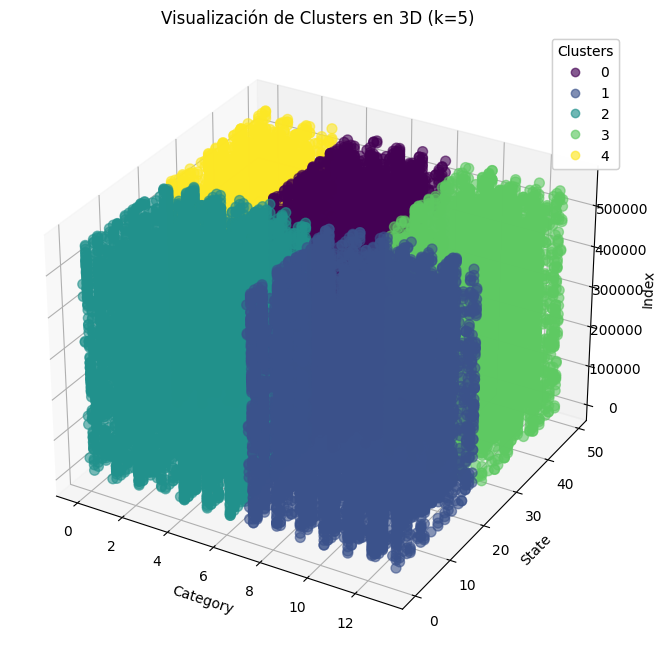

Resumen de los clusters:
         Category Mean  Category Std  Category Min  Category Max  State Mean  \
cluster                                                                        
0             5.836323      1.326908             4             8   36.803958   
1             9.917529      1.899968             7            13   12.551207   
2             3.054611      2.010670             0             6   12.318659   
3            10.918555      1.269774             9            13   37.445301   
4             1.324794      1.003505             0             3   36.926365   

         State Std  State Min  State Max  Count  
cluster                                          
0         6.924187         23         49  10814  
1         7.351351          0         25  10731  
2         7.231748          0         25  11994  
3         6.488647         24         49   8693  
4         6.789197         23         49   7768  


In [ ]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 50000  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Aplicar K-Means a la muestra
n_clusters = 5  # Cambia esto según el número de clusters deseado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

# Graficar en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_sample['category_encoded'],
    df_sample['state_encoded'],
    df_sample.index,  # Usamos el índice como tercera dimensión para la visualización en 3D
    c=df_sample['cluster'], cmap='viridis', s=50, alpha=0.6
)

# Etiquetas y título
ax.set_title(f'Visualización de Clusters en 3D (k={n_clusters})')
ax.set_xlabel('Category')
ax.set_ylabel('State')
ax.set_zlabel('Index')

# Mostrar leyenda de colores
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

# Análisis descriptivo de los clusters
cluster_summary = df_sample.groupby('cluster').agg({
    'category_encoded': ['mean', 'std', 'min', 'max'],
    'state_encoded': ['mean', 'std', 'min', 'max'],
    'cluster': 'count'  # Para contar cuántos datos hay en cada cluster
})

# Renombrar columnas para mayor claridad
cluster_summary.columns = [
    'Category Mean', 'Category Std', 'Category Min', 'Category Max',
    'State Mean', 'State Std', 'State Min', 'State Max',
    'Count'
]

# Mostrar el resumen
print("Resumen de los clusters:")
print(cluster_summary)

**Comparación General**

* **Categoría:** Los Clusters 1 y 3 tienen medias de categoría altas, mientras que los Clusters 0, 2 y 4 tienen medias bajas. La variabilidad de las categorías es más alta en los Clusters 1 y 2.

* **Estado:** Los Clusters 0, 3 y 4 tienen medias de estado altas, mientras que los Clusters 1 y 2 tienen medias bajas. La variabilidad en el estado es alta en todos los clusters, pero especialmente en los Clusters 1 y 2.

Cada cluster muestra patrones distintos tanto en términos de categoría como de estado, lo que sugiere diferentes segmentos o perfiles dentro de tus datos. Esto puede ser útil para entender mejor las características de tus datos y para tomar decisiones basadas en estos segmentos.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


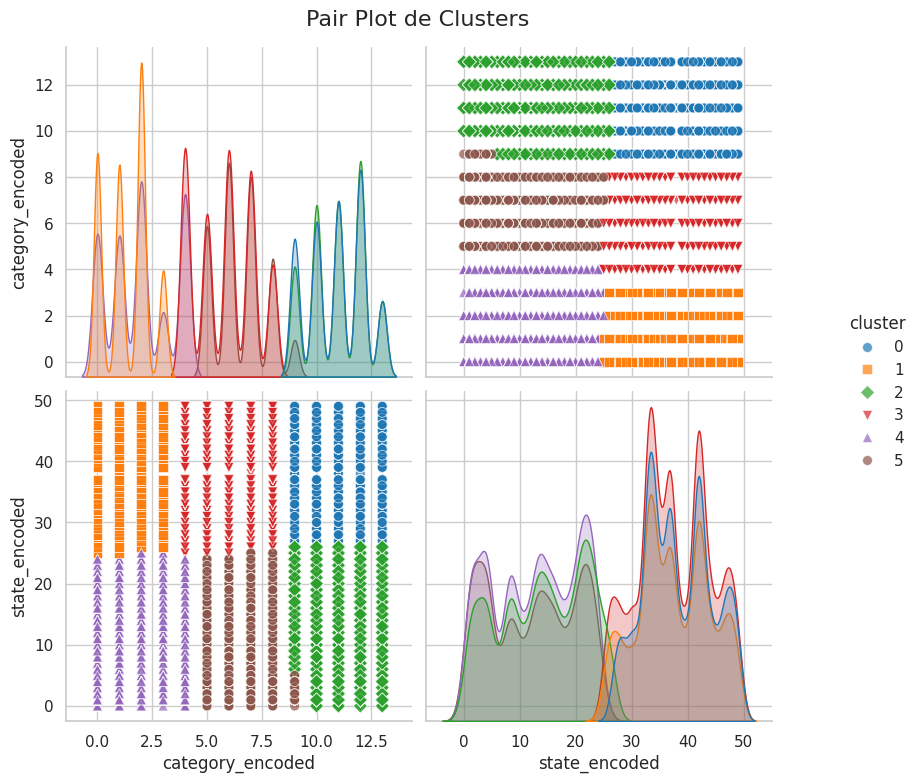

Número de puntos en cada cluster:
cluster
0     8184
1     7479
2     7949
3    10320
4     8847
5     7221
Name: count, dtype: int64

Estadísticas descriptivas por cluster:
         category_encoded_mean  category_encoded_std  category_encoded_min  \
cluster                                                                      
0                    10.902981              1.268681                     9   
1                     1.354459              0.999688                     0   
2                    10.967291              1.228207                     9   
3                     5.796802              1.344840                     4   
4                     2.003730              1.440542                     0   
5                     6.549370              1.140640                     5   

         category_encoded_max  state_encoded_mean  state_encoded_std  \
cluster                                                                
0                          13           38.173998        

In [ ]:
# Configuración del estilo
sns.set(style="whitegrid")

# Crear el pairplot con ajustes
pairplot = sns.pairplot(
    df_sample,
    hue='cluster',
    vars=['category_encoded', 'state_encoded'],
    palette='tab10',  # Paleta de colores distintiva
    markers=["o", "s", "D", "v", "^"],  # Diferentes marcadores para clusters
    plot_kws={'alpha': 0.7, 's': 50}  # Ajustes de opacidad y tamaño de puntos
)

# Ajustar el tamaño del gráfico
pairplot.fig.set_size_inches(10, 8)

# Ajustar el título
pairplot.fig.suptitle('Pair Plot de Clusters', y=1.02, fontsize=16)

# Mostrar el gráfico
plt.show()

# Análisis adicional

# 1. Número de puntos en cada cluster
cluster_counts = df_sample['cluster'].value_counts().sort_index()
print("Número de puntos en cada cluster:")
print(cluster_counts)

# 2. Estadísticas descriptivas por cluster
cluster_summary = df_sample.groupby('cluster').agg({
    'category_encoded': ['mean', 'std', 'min', 'max'],
    'state_encoded': ['mean', 'std', 'min', 'max']
})
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
print("\nEstadísticas descriptivas por cluster:")
print(cluster_summary)

**Análisis:**

* Distribución Equitativa: Los clusters están relativamente bien distribuidos, con el número de puntos en cada cluster variando entre 7,221 y 10,320. Esto sugiere que el algoritmo de clustering ha creado clusters de tamaño similar, aunque hay una ligera variación.

* Cluster con Más Puntos: El cluster 3 tiene la mayor cantidad de puntos (10,320), lo que podría indicar que este cluster representa una categoría más común o general en los datos.

* Cluster con Menos Puntos: El cluster 5 tiene el menor número de puntos (7,221), lo que puede indicar que es un grupo menos frecuente o más específico.

**Variables Categoría**

* Clusters con Valores Altos: Los clusters 0 y 2 tienen valores medios altos en la variable category_encoded (alrededor de 10.9 y 11.0, respectivamente), lo que podría sugerir que estos clusters contienen elementos con categorías más altas.

* Clusters con Valores Bajos: Los clusters 1 y 4 tienen valores medios bajos (alrededor de 1.35 y 2.00, respectivamente), indicando que estos clusters podrían representar categorías más bajas.

**Variables Estado**

* Clusters con Valores Altos: Los clusters 0, 1 y 3 tienen valores medios altos en la variable state_encoded (alrededor de 37.4), lo que sugiere que estos clusters tienden a agrupar datos con estados en el rango alto.

* Clusters con Valores Bajos: Los clusters 2, 4 y 5 tienen valores medios bajos (alrededor de 12.3 a 14.1), lo que puede indicar que estos clusters representan estados en el rango bajo.

**CONCLUSION**

*Diferenciación de Clusters:* Los clusters presentan diferentes patrones en términos de las variables category_encoded y state_encoded. Los clusters con valores altos en ambas variables pueden representar categorías comunes o más significativas en los datos, mientras que los clusters con valores bajos podrían representar categorías menos comunes o menos significativas.

*Tamaño de Clusters:* La variación en el número de puntos por cluster indica una diversidad en la representación de datos entre los clusters. Algunos clusters son más grandes y pueden representar características más comunes o dominantes en los datos, mientras que otros son más pequeños y pueden representar características más específicas o menos frecuentes.

In [41]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 50000  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Aplicar K-Means para diferentes valores de k y evaluar
k_values = [3, 4, 5, 6, 7]  # Puedes ajustar estos valores según sea necesario
silhouette_avg_scores = []
cluster_summaries = []

for n_clusters in k_values:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

    # Calcular los Silhouette Scores
    silhouette_vals = silhouette_samples(features_sample_scaled, df_sample['cluster'])
    silhouette_avg = silhouette_score(features_sample_scaled, df_sample['cluster'])
    silhouette_avg_scores.append(silhouette_avg)

    # Resumen descriptivo de los clusters
    cluster_summary = df_sample.groupby('cluster').agg({
        'category_encoded': ['mean', 'std', 'min', 'max'],
        'state_encoded': ['mean', 'std', 'min', 'max'],
        'cluster': 'count'
    })
    cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
    cluster_summary.rename(columns={'cluster_count': 'Count'}, inplace=True)
    cluster_summaries.append((n_clusters, cluster_summary))




# Imprimir los resultados del análisis de Silhouette
for i, n_clusters in enumerate(k_values):
    print(f'k={n_clusters}: Average Silhouette Score = {silhouette_avg_scores[i]:.4f}')

# Imprimir los resúmenes de los clusters para cada valor de k
for n_clusters, summary in cluster_summaries:
    print(f'\nCluster Summary for k={n_clusters}:')
    print(summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

k=3: Average Silhouette Score = 0.3856
k=4: Average Silhouette Score = 0.4112
k=5: Average Silhouette Score = 0.3947
k=6: Average Silhouette Score = 0.3784
k=7: Average Silhouette Score = 0.3999

Cluster Summary for k=3:
         category_encoded_mean  category_encoded_std  category_encoded_min  \
cluster                                                                      
0                    10.120434              1.907238                     7   
1                     2.854824              2.023865                     0   
2                     6.061192              3.552877                     0   

         category_encoded_max  state_encoded_mean  state_encoded_std  \
cluster                                                                
0                          13           33.937671           9.091716   
1                           6           34.959367           8.308571   
2                          13           10.174666           6.553584   

         state_encoded_min 

**CONCLUSIÓN**

* Mejor Valor de k: Basado en el Silhouette Score, el valor óptimo parece ser
k=4, proporcionando la mejor separación entre clusters.

* Distribución y Características: La elección del valor de k afecta la distribución de puntos y las características de los clusters. Cada valor de
k ofrece diferentes formas de segmentar los datos, lo cual puede ser más o menos adecuado dependiendo de los objetivos del análisis.

* Número de Clusters: Con más clusters (k=7), los clusters tienden a ser más específicos, pero esto también puede llevar a una menor cohesión interna en comparación con menos clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score promedio para k=3: 0.3856

Resumen de clusters:
   cluster  category_encoded_mean  category_encoded_std  category_encoded_min  \
0        0              10.120434              1.907238                     7   
1        1               2.854824              2.023865                     0   
2        2               6.061192              3.552877                     0   

   category_encoded_max  state_encoded_mean  state_encoded_std  \
0                    13           33.937671           9.091716   
1                     6           34.959367           8.308571   
2                    13           10.174666           6.553584   

   state_encoded_min  state_encoded_max  Count  
0                 12                 49  15386  
1                 16                 49  16883  
2                  0                 25  17731  


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



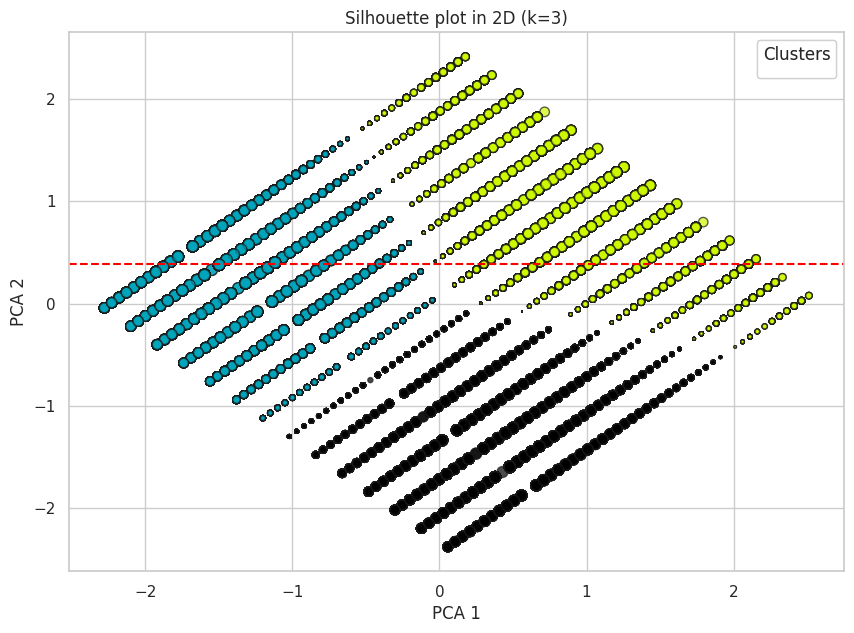

In [44]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 50000  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Aplicar K-Means a la muestra
n_clusters = 3  # Cambia esto según el número de clusters deseado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

# Calcular los Silhouette Scores
silhouette_vals = silhouette_samples(features_sample_scaled, df_sample['cluster'])
silhouette_avg = silhouette_score(features_sample_scaled, df_sample['cluster'])

# Resumen del Silhouette Score
print(f"Silhouette Score promedio para k={n_clusters}: {silhouette_avg:.4f}")

# Resumen de los clusters
cluster_summary = df_sample.groupby('cluster').agg(
    category_encoded_mean=('category_encoded', 'mean'),
    category_encoded_std=('category_encoded', 'std'),
    category_encoded_min=('category_encoded', 'min'),
    category_encoded_max=('category_encoded', 'max'),
    state_encoded_mean=('state_encoded', 'mean'),
    state_encoded_std=('state_encoded', 'std'),
    state_encoded_min=('state_encoded', 'min'),
    state_encoded_max=('state_encoded', 'max'),
    Count=('state_encoded', 'count')
).reset_index()

print("\nResumen de clusters:")
print(cluster_summary)

# Reducir la dimensionalidad para visualizar en 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_sample_scaled)

# Graficar Silhouette en 2D
fig, ax = plt.subplots(figsize=(10, 7))

# Mapear colores para los clusters
colors = plt.cm.nipy_spectral(df_sample['cluster'].astype(float) / n_clusters)

# Graficar los datos
sc = ax.scatter(features_pca[:, 0], features_pca[:, 1],
                c=colors, s=silhouette_vals * 100, edgecolor='k', alpha=0.7)

# Etiquetas y título
ax.set_title(f'Silhouette plot in 2D (k={n_clusters})')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

# Añadir una línea horizontal en el valor promedio de Silhouette
ax.axhline(y=silhouette_avg, color="red", linestyle="--", label=f'Average Silhouette Score: {silhouette_avg:.2f}')

# Mostrar leyenda de colores
legend = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend)

# Mostrar el gráfico
plt.show()

**Conclusiones Generales:**

* **Homogeneidad y Separación:** La homogeneidad dentro de los clusters parece aceptable, pero la moderada puntuación de Silhouette sugiere que los clusters no están perfectamente separados. Esto podría ser una señal para experimentar con diferentes números de clusters o métodos de clustering.

* **Tamaño de los Clusters:** Los clusters tienen tamaños similares, lo cual es positivo en términos de balance. Sin embargo, los valores medios de las categorías y los estados muestran cierta variabilidad que podría ser investigada más a fondo para entender mejor las diferencias y similitudes entre los clusters.

* **Distribución Geográfica:** Hay una notable diferencia en la dispersión geográfica de los clusters. Cluster 2 tiene una concentración en menos estados, mientras que Clusters 0 y 1 están más dispersos, lo que podría ser relevante para estrategias de mercado o distribución.

Este análisis sugiere que el modelo de clustering con k=3 está capturando algunas estructuras en los datos, pero podría beneficiarse de un ajuste fino o de una evaluación adicional con más métricas para mejorar la calidad del clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Resumen de Clusters:
   cluster  category_encoded_mean  category_encoded_std  category_encoded_min  \
0        0               6.186596              3.920566                     0   
1        1               6.199382              3.936860                     0   
2        2              10.804749              1.554607                     8   

   category_encoded_max  state_encoded_mean  state_encoded_std  \
0                    13           37.581014           6.334030   
1                    13           12.951044           7.514336   
2                    13           25.253298          14.368514   

   state_encoded_min  state_encoded_max     amt_mean     amt_std  amt_min  \
0                 26                 49    61.436726   70.062683     1.00   
1                  0                 25    61.050517   69.350618     1.00   
2                  0                 49  1169.289868  814.883230   607.54   

   amt_max  count  
0   640.20  26008  
1   616.81  23613  
2  7587.23    379  


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning:

invalid value encountered in sqrt



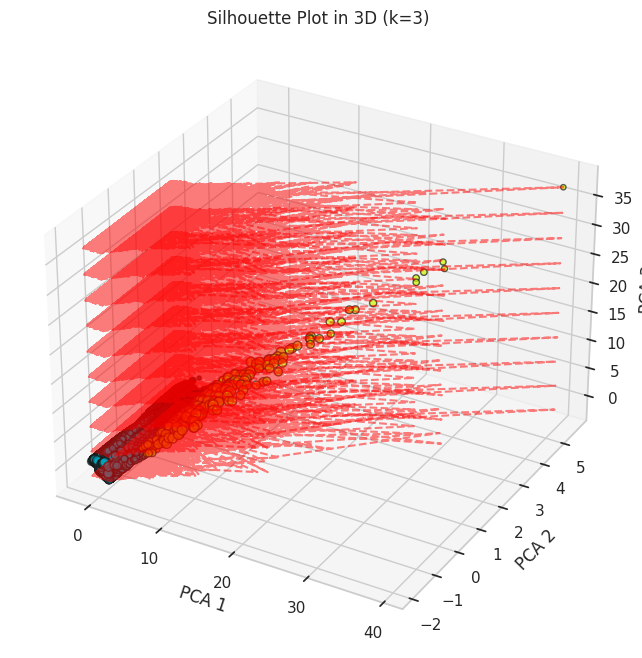

In [45]:
# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 50000  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded', 'amt']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Aplicar K-Means a la muestra
n_clusters = 3  # Cambia esto según el número de clusters deseado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

# Calcular los Silhouette Scores
silhouette_vals = silhouette_samples(features_sample_scaled, df_sample['cluster'])
silhouette_avg = silhouette_score(features_sample_scaled, df_sample['cluster'])

# Reducir la dimensionalidad para visualizar en 3D (PCA con 3 componentes)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_sample_scaled)

# Agregar análisis de clusters
cluster_summary = df_sample.groupby('cluster').agg({
    'category_encoded': ['mean', 'std', 'min', 'max'],
    'state_encoded': ['mean', 'std', 'min', 'max'],
    'amt': ['mean', 'std', 'min', 'max'],
    'cluster': 'count'
}).reset_index()

# Renombrar columnas para mayor claridad
cluster_summary.columns = ['cluster', 'category_encoded_mean', 'category_encoded_std', 'category_encoded_min', 'category_encoded_max',
                           'state_encoded_mean', 'state_encoded_std', 'state_encoded_min', 'state_encoded_max',
                           'amt_mean', 'amt_std', 'amt_min', 'amt_max', 'count']

# Imprimir el resumen de clusters
print("Resumen de Clusters:")
print(cluster_summary)

# Graficar en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Mapear colores para los clusters
colors = plt.cm.nipy_spectral(df_sample['cluster'].astype(float) / n_clusters)

# Graficar los datos
scatter = ax.scatter(
    features_pca[:, 0],
    features_pca[:, 1],
    features_pca[:, 2],
    c=colors,
    s=silhouette_vals * 100,  # Tamaño de los puntos basado en el coeficiente de Silhouette
    edgecolor='k',
    alpha=0.7
)

# Etiquetas y título
ax.set_title(f'Silhouette Plot in 3D (k={n_clusters})')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Opcional: Añadir un plano o línea horizontal en el valor promedio de Silhouette
for i in np.linspace(min(features_pca[:, 2]), max(features_pca[:, 2]), 10):
    ax.plot(features_pca[:, 0], features_pca[:, 1], i, color="red", linestyle="--", alpha=0.5)

plt.show()

**Conclusión**

* Clusters 0 y 1:

    * Son los más grandes en términos de cantidad de puntos y tienen montos de transacción similares (promedio alrededor de 61), pero se diferencian en la distribución geográfica (state_encoded_mean), con Cluster 0 enfocado en estados de codificación más alta y Cluster 1 en estados de codificación más baja.
    * Ambos tienen una amplia gama de categorías.

* Cluster 2:

    * Es mucho más pequeño, pero se destaca claramente por las transacciones de alto valor, con montos significativamente mayores.

    * Las categorías en este cluster están más concentradas en valores altos (category_encoded_mean cerca de 11), y las transacciones están distribuidas en una mayor diversidad de estados.

Este análisis sugiere que Cluster 2 podría representar un segmento de clientes o transacciones que son particularmente de alto valor y podrían ser de interés especial para estrategias de negocio o análisis de fraude, mientras que Clusters 0 y 1 son más representativos de la masa de transacciones comunes con diferente distribución geográfica.

In [46]:
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Codificar las columnas categóricas en números
label_encoder_category = LabelEncoder()
label_encoder_state = LabelEncoder()

df_fraude['category_encoded'] = label_encoder_category.fit_transform(df_fraude['category'])
df_fraude['state_encoded'] = label_encoder_state.fit_transform(df_fraude['state'])

# Seleccionar el tamaño de la muestra
sample_size = 50000  # Cambia esto según sea necesario

# Tomar una muestra aleatoria de índices
np.random.seed(42)  # Para reproducibilidad
sample_indices = np.random.choice(df_fraude.index, size=sample_size, replace=False)

# Crear la muestra usando los índices seleccionados
df_sample = df_fraude.loc[sample_indices].copy()

# Seleccionar las características para el clustering
features_sample = df_sample[['category_encoded', 'state_encoded', 'zip']]

# Normalizar/estandarizar los datos numéricos en la muestra
scaler = StandardScaler()
features_sample_scaled = scaler.fit_transform(features_sample)

# Aplicar K-Means a la muestra
n_clusters = 3  # Cambia esto según el número de clusters deseado
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(features_sample_scaled)

# Calcular los Silhouette Scores
silhouette_vals = silhouette_samples(features_sample_scaled, df_sample['cluster'])
silhouette_avg = silhouette_score(features_sample_scaled, df_sample['cluster'])

# Reducir la dimensionalidad para visualizar en 3D (PCA con 3 componentes)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_sample_scaled)

# Agregar análisis de clusters
cluster_summary = df_sample.groupby('cluster').agg({
    'category_encoded': ['mean', 'std', 'min', 'max'],
    'state_encoded': ['mean', 'std', 'min', 'max'],
    'amt': ['mean', 'std', 'min', 'max'],
    'cluster': 'count'
}).reset_index()

# Renombrar columnas para mayor claridad
cluster_summary.columns = ['cluster', 'category_encoded_mean', 'category_encoded_std', 'category_encoded_min', 'category_encoded_max',
                           'state_encoded_mean', 'state_encoded_std', 'state_encoded_min', 'state_encoded_max',
                           'amt_mean', 'amt_std', 'amt_min', 'amt_max', 'count']

# Imprimir el resumen de clusters
print("Resumen de Clusters:")
print(cluster_summary)

# Graficar en 3D con Plotly
fig = go.Figure()

# Añadir los puntos de datos
fig.add_trace(go.Scatter3d(
    x=features_pca[:, 0],
    y=features_pca[:, 1],
    z=features_pca[:, 2],
    mode='markers',
    marker=dict(
        size=np.clip(silhouette_vals * 10, 5, 30),  # Ajustar el tamaño de los puntos
        color=df_sample['cluster'],
        colorscale='Viridis',
        opacity=0.8,
        line=dict(width=0.5, color='black')
    ),
    text=[f'Cluster {cluster}' for cluster in df_sample['cluster']],
    hoverinfo='text'
))

# Añadir el título y etiquetas
fig.update_layout(
    title=f'Silhouette Plot in 3D (k={n_clusters})',
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    coloraxis_colorbar=dict(title='Cluster')
)


# Añadir un plano en la coordenada z
for i in np.linspace(min(features_pca[:, 2]), max(features_pca[:, 2]), 10):
    ax.plot(features_pca[:, 0], features_pca[:, 1], i, color="red", linestyle="--", alpha=0.5)

fig.show()


Output hidden; open in https://colab.research.google.com to view.

**Conclusión**

1. Distribución Similar en Categorías:

  * Todos los clusters tienen valores medios muy similares para category_encoded_mean (alrededor de 6.22 a 6.24) y una desviación estándar también comparable, lo que sugiere que no hay una gran diferenciación en términos de las categorías en las que se agrupan las transacciones.

2. Diferenciación Geográfica:

  * Cluster 1 tiene un enfoque geográfico diferente, con un promedio de estado codificado mucho más alto (40.12), lo que lo distingue de los otros dos clusters.
  * Cluster 2 es el opuesto, con un state_encoded_mean bajo (12.35), indicando que se agrupa en áreas con codificaciones más bajas.

3. Variabilidad en Montos de Transacción:

  * Aunque los tres clusters tienen montos promedio de transacción similares (entre 67.75 y 70.18), la variabilidad dentro de cada cluster varía significativamente, especialmente en Cluster 0, que tiene la mayor desviación estándar y el monto máximo más alto.

  * Cluster 1, con la menor desviación estándar, indica que las transacciones dentro de este grupo son más uniformes en términos de valor.

Este análisis sugiere que, si bien los clusters no están muy diferenciados en cuanto a las categorías, sí muestran diferencias significativas en la distribución geográfica (state_encoded_mean) y en la variabilidad de los montos de las transacciones. Cluster 1 parece estar más concentrado en áreas geográficas específicas con valores más altos de codificación de estado, mientras que Cluster 2 se centra en áreas con valores más bajos, siendo Cluster 0 un punto intermedio en ambos aspectos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

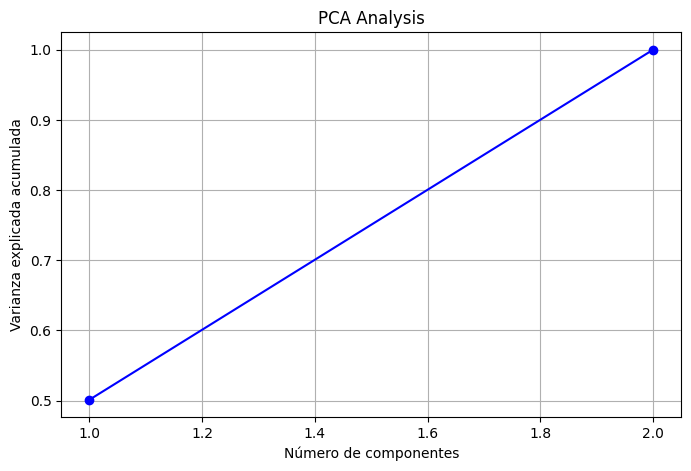

Métrica de homogeneidad promedio: 0.015692286810823873


In [ ]:
# Escalar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número máximo de componentes posibles
n_features = features_scaled.shape[1]

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=n_features)  # Usamos n_features para obtener la varianza explicada de todos los componentes
X_pca = pca.fit_transform(features_scaled)

# Obtener la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Crear el eje x con el número de componentes
comp_n_axis = np.arange(1, len(explained_variance) + 1)

# Variance acumulada por cada componente
variance_axis = np.cumsum(explained_variance)

# Crear un modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Crear un scorer basado en homogeneity_score
homogeneity_scorer = make_scorer(homogeneity_score)

# Evaluar el modelo utilizando validación cruzada
scores = cross_val_score(kmeans, X_pca[:, :2], df_fraude['is_fraud'], cv=5, scoring=homogeneity_scorer)

# Crear el gráfico de varianza explicada
plt.figure(figsize=(8, 5))
plt.title('PCA Analysis')
plt.ylabel('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.plot(comp_n_axis, variance_axis, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.show()

# Imprimir la métrica de homogeneidad promedio
print(f'Métrica de homogeneidad promedio: {scores.mean()}')


**Valor Bajo (0.0157):** Este valor indica una baja homogeneidad en el clustering. Esto sugiere que los clusters no están bien definidos en términos de las etiquetas verdaderas; es decir, los puntos dentro de los clusters están bastante mezclados con diferentes clases verdaderas.

La métrica de homogeneidad te proporciona una visión sobre la calidad del clustering en términos de clases conocidas, pero debe ser complementada con otras métricas y análisis para obtener una evaluación más completa.








# OBSERVACIONES

En esta oportunidad empezamos trabajando con el Dataset en bruto, con los datos como los utilizamos al principio.
Usamos todas lasvariables numéricas. Nos encontramos con dificultades ya que nuestros datos eran mucha cantidad, y en la mayoría tuvimos que hacer reducciones para poder llegar a tratar de obtener datos claros.
Al final decidimos hacer un análisis con Categorías, Estados y en algunos casos Monto, para poder ver si el método era realmente util para nuetro objetivo.
Que en muchos casos nos arrojaba falsos positivos, al ser muy pequeña la muestra de fraude.

# CONCLUSIÓN FINAL

**Detección de Fraude**

A lo largo de los diferentes experimentos y análisis que has realizado, se han utilizado métodos de agrupamiento no supervisado, como K-Means, y se han evaluado usando métricas como el Silhouette Score. El objetivo era identificar patrones y posibles clusters que diferenciaran transacciones fraudulentas de las no fraudulentas en función de las variables disponibles.

1. **Rendimiento de los Modelos**

  * **Silhouette Scores:** Los puntajes promedio de Silhouette que has obtenido para diferentes valores de k han variado. Los puntajes típicos se encuentran en un rango de 0.38 a 0.41, lo cual indica una estructura de clusters débilmente definida. Un Silhouette Score cercano a 0 sugiere que los puntos están en el borde de los clusters o incluso pueden estar asignados incorrectamente.

  * **Interpretación de Clusters:** Los resúmenes de los clusters muestran que, aunque los datos se agrupan en diferentes clusters, no hay una clara separación o caracterización que indique una división evidente entre transacciones fraudulentas y no fraudulentas basada únicamente en las variables disponibles (category_encoded, state_encoded, amt).

2. **Variabilidad en los Datos**

   * **Clusters Geográficos y de Montos:** Se ha observado que los clusters tienen variaciones en términos de geografía (state_encoded_mean) y montos de transacción (amt_mean). Sin embargo, estas diferencias no son suficientemente marcadas como para identificar patrones claros de fraude. Los montos de transacción y las categorías parecen estar distribuidos de manera similar entre los clusters.

   * **Distribución de Categorías y Estados:** La similitud en los valores medios de category_encoded_mean y state_encoded_mean entre los clusters sugiere que no hay una gran diferenciación en estas dimensiones que pueda ser directamente atribuible al fraude.

3. **¿Es Detectable el Fraude con Estos Métodos?**

**Separación Incompleta:** Dado que los clusters formados por los algoritmos no supervisados no muestran una separación clara entre transacciones potencialmente fraudulentas y no fraudulentas, y que los Silhouette Scores indican clusters débilmente definidos, es probable que el **fraude no sea fácilmente detectable** utilizando estos métodos sin una mayor transformación de los datos o sin la incorporación de características adicionales.

**Limitaciones del Enfoque No Supervisado:** Los métodos no supervisados como K-Means dependen en gran medida de la calidad de las características de entrada. En este caso, parece que las características category_encoded, state_encoded, y amt no son suficientes para capturar la complejidad de los patrones de fraude. Además, estos métodos no supervisados no tienen información sobre la etiqueta de fraude, lo que limita su capacidad para diferenciar entre comportamientos legítimos y fraudulentos.

**Necesidad de Métodos Supervisados o Híbridos:** Para mejorar la detección de fraude, podría ser más efectivo utilizar métodos supervisados, que aprovechen etiquetas de fraude/no fraude. Alternativamente, una estrategia híbrida que combine clustering no supervisado para la detección de anomalías con un modelo supervisado podría ser más efectiva.

**Los resultados obtenidos sugieren que el fraude no es fácilmente detectable con los métodos no supervisados utilizados. La débil definición de los clusters y la similitud en las características clave entre ellos indican que los datos pueden necesitar más preprocesamiento, o que es necesario un cambio hacia métodos supervisados para mejorar la precisión de la detección de fraude.**

